# Supervised Auto-Classification of Salesforce Help Documentation
**Thomas Bohn**   --   **2024-10-10**

Develop a natural language processing (NLP) model to automate the classification of Salesforce documentation across various product features and cloud services, such as Sales Cloud and Service Cloud. Using a range of supervised learning algorithms,explore the feasibility of reducing manual content tagging by automatically categorizing documentation based on textual content. By leveraging tools like BeautifulSoup and Selenium for data collection and employing machine learning techniques such as TF-IDF vectorization, Support Vector Machine (SVM), and Logistic Regression, create a comprehensive pipeline for classifying Salesforce documentation. The models were trained and evaluated on a custom dataset of over 1,400 documents, achieving validation accuracies as high as 99.32%. The best-performing model, a Linear SVM, demonstrated exceptional accuracy and generalization across multiple levels of classification tasks, ranging from high-level cloud categorization (L0) to more granular job-specific (L1) and feature-specific (L2) tagging. By automating the classification process, provide a scalable solution for improving documentation discoverability and consistency across Salesforce platforms, significantly reducing the manual tagging workload while enhancing the precision and reliability of content retrieval.

--  [Main Report](https://github.com/TOM-BOHN/MsDS-supervised-nlp-sfdc-auto-classification/blob/main/auto_classifying_salesforce_cloud_documentation.ipynb)  --  [Github Repo](https://github.com/TOM-BOHN/MsDS-supervised-nlp-sfdc-auto-classification)  --  [Presentation Slides](TBD)  --  [Presentation Video](TBD) --

# 1.&nbsp;Introduction

**Problem Statement**

Salesforce documentation is essential for users to effectively understand and utilize Salesforce products. However, the content is scattered across multiple platforms, including Release Notes, Salesforce Help Documentation, and Trailhead training modules. Each platform employs its own tagging and classification systems, making it difficult to provide a unified view of documentation across Salesforce Clouds like Sales Cloud and Service Cloud.

The primary challenge is to develop an automated system for classifying Salesforce documentation based on the Salesforce Cloud and relevant product features. The objective is to addresses the question:

How can a supervised machine learning model, using natural language processing (NLP), automate the classification of Salesforce documentation, while reducing the reliance on manual tagging and improving the accessibility of product-specific content?

**Why is it Important?**

Salesforce customers rely on accurate, easily accessible documentation to support their use of the platform’s extensive features. However, Salesforce documentation is spread across different content sources, each tagged differently. This creates inefficiencies when users need to search for content related to specific Salesforce Clouds or product features.

Manual tagging is labor-intensive and prone to inconsistencies, as different teams and platforms may use different terminologies and tagging conventions. Furthermore, existing search functionalities within Salesforce platforms tend to be keyword-based, limiting their ability to capture the deeper context of content related to specific Clouds or features.

Automating the classification of this documentation:

- Reduces the manual workload by streamlining the tagging process.
- Ensures consistency across platforms and content types.
- Improves search and recommendation systems by enabling more granular tagging of content based on actual content rather than surface-level metadata.

By building a robust, automated classification pipeline that can tag Salesforce documentation with high accuracy, thereby improving discoverability and easing the manual burden on content managers.

**Limitations of Existing Solutions**

Current solutions within Salesforce rely heavily on manual content tagging and keyword searches. Some platforms, like Salesforce Help Documentation and Trailhead, allow for basic filtering by topics or product features, but these systems are often inconsistent between platforms, which hinders users from getting a unified, cross-platform view of relevant content.

Additionally, while generative AI models, such as those in some of Salesforce’s newer AI-driven platforms, allow for enhanced content search based on keywords or metadata, they lack the ability to deeply understand and categorize the full body of content. This limitation results in incomplete content discovery, as the models are unable to differentiate or understand specific Salesforce features or product lines embedded within longer articles.

**Contribution**

The desired state is to develop a fully automated pipeline that leverages NLP and machine learning techniques to classify Salesforce documentation into relevant Salesforce Clouds (e.g., Sales Cloud, Service Cloud) and features.
By building this pipeline, the work makes several contributions:

- Creation of a Unified Salesforce Documentation Corpus: A custom corpus will be developed, comprising Salesforce content related to Sales Cloud and Service Cloud.
- Automation of Content Tagging: A supervised learning model will be trained to classify documentation by Cloud type and specific product features, significantly reducing the need for manual tagging.
- Improved Content Discovery: The automated tagging will improve Salesforce's ability to provide recommendations and search results based on the actual content of documentation, not just superficial metadata.
- Reproducibility and Reusability: The resulting models and data processing pipeline will be reusable for classifying other Salesforce Clouds or expanding to other products and features.

The long-term goal is to reduce the manual tagging workload by up to 80%, providing humans with a simple binary decision—approve or reject AI-generated tags.

**DataSet**

A significant portion of work focused on the collecting, preparing, and merging the Salesforce documentation data from two primary sources: Sales Cloud and Service Cloud. The data collected includes web-scraped articles, each containing important metadata like titles, text content, and document structure. This data serves as the foundation for building and training the machine learning models used for classifying Salesforce documentation.

The data was sourced through web scraping of Salesforce documentation using two primary tools: BeautifulSoup and Selenium. BeautifulSoup was used to parse HTML content and extract text data from static web pages, while Selenium was employed to scrape dynamic web content where information is loaded via JavaScript. Two separate datasets were collected: one for Sales Cloud documentation, which includes articles related to topics such as sales process management, lead generation, and reporting, and another for Service Cloud documentation, which covers customer service, case management, and support automation. The scraped data included metadata such as article titles, body text, URLs, and a hierarchical structure indicating the document's placement within the Salesforce documentation site. The extracted data was then stored in two separate pickle files—sales_core_df.pickle for Sales Cloud articles and service_cloud_df.pickle for Service Cloud articles. These files were subsequently loaded into two DataFrames, data_sales and data_service, for further processing and merging.

The final dataset, after cleaning, contained a total of 1,470 documents, each representing an article related to either Sales Cloud or Service Cloud. The dataset was highly efficient to handle in the notebook, with a memory usage of approximately 0.13 MB. Each document in the dataset was structured with several key fields, including aria-level (indicating hierarchical levels), title, id, text (full article content), and url, which provided crucial context for document categorization in later stages. To better understand the data distribution, the dataset was grouped by Salesforce Cloud type, with 646 records (44%) belonging to Sales Cloud and 824 records (56%) associated with Service Cloud. While the dataset was relatively balanced, the Service Cloud documentation had a slightly larger representation, which was considered in model evaluation.


## Python Libraries

The following python libraries are used in this notebook.

In [1]:
# File system manangement
import time, datetime, psutil, os

# Data manipulation
import numpy as np
import pandas as pd
import math

# Install text storage and manipulation
import re
import json
import pickle
import textwrap

##################################

# Plotting and visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_theme()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Train-test split and cross validation
from sklearn.model_selection import train_test_split, ParameterGrid

# NLP
import string, re, nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
!pip install num2words
from num2words import num2words
!pip install pyspellchecker
from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Global Variables

The following are global variables referenced in this notebook.

In [2]:
# Recording the starting time, complemented with a stopping time check in the end to compute process runtime
start = time.time()

# Class representing the OS process and having memory_info() method to compute process memory usage
process = psutil.Process(os.getpid())

In [3]:
# Global Debug flag used to turn on and off more chatty blocks of code
gDEBUG = False
if gDEBUG: print('Debug is set to:', gDEBUG)
# Global Level of Detail of table stats and details
gLOD = 2
print('Level of Detail for functions is set to:', gLOD)

Level of Detail for functions is set to: 2


# 2.&nbsp;Data Source

In this section, the code loads the dataset from Google Drive. Two data sources (Sales and Service cloud documentation) are merged, cleansed, and prepared for analysis. After merging, the dataset is consolidated into a single table with key columns like 'aria-level', 'title', and 'text', which is used throughout the project.

## About the Scrapping Process

## Import the Data

In [4]:
# Mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

file_path_root = '/content/drive/MyDrive/[1.4] MsDS Class Files/-- DTSA 5506 Data Mining Presentation/data'
file_path_sales   = file_path_root + '/sales_core_df.pickle'
file_path_service = file_path_root + '/service_cloud_df.pickle'


# Load the Service Data From Pickle
with open(file_path_service, 'rb') as f:
  data_service = pickle.load(f)
# Load the Sales Data From Pickle
with open(file_path_sales, 'rb') as f:
  data_sales = pickle.load(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
if gDEBUG:
  # Preview the Data Sources
  display(data_service.head(1))
  display(data_sales.head(1))

## Data Preparation

In [6]:
# Find the set of different columns between the two DataFrames
different_columns = set(data_sales.columns) ^ set(data_service.columns)

print("Columns to dropped from tables:", list(different_columns))

# Drop the columns in the difference from both DataFrames
data_sales = data_sales.drop(columns=list(different_columns.intersection(set(data_sales.columns))))
data_service = data_service.drop(columns=list(different_columns.intersection(set(data_service.columns))))

print("Drop Completed.")

Columns to dropped from tables: ['l8_title', 'l8_id']
Drop Completed.


In [7]:
# Union the 2 tables together to make a single table of data
if list(data_sales.columns) == list(data_service.columns):
  # Merge the DataFrames
  data_merged = pd.concat([data_sales, data_service], ignore_index=True)

  # Specify the columns to keep
  columns_to_keep = ['aria-level', 'title', 'id', 'l0_id', 'l1_id',
                     'l2_id', 'l0_title', 'l1_title', 'l2_title', 'url', 'text']

  # Subset the DataFrame to keep only the specified columns
  data_merged = data_merged[columns_to_keep]

  # Summary of the shape of the data
  print(pd.Series({"Memory usage": "{:.2f} MB".format(data_merged.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(data_merged.shape)}).to_string())

  # Print the DataFrame to the screen
  print("Columns in table:", list(data_merged.columns))
else:
  print("The columns in the two DataFrames are not the same. Cannot merge.")

Memory usage        0.13 MB
Dataset shape    (1498, 11)
Columns in table: ['aria-level', 'title', 'id', 'l0_id', 'l1_id', 'l2_id', 'l0_title', 'l1_title', 'l2_title', 'url', 'text']


In [8]:
if gDEBUG:
  #Example of the table created
  print("Example of the table created:\n")
  display(data_merged.head(3))

In [9]:
# Example of the text from the article
example_text = data_merged['text'].iloc[100]
# Print to Screen
print("Length of Text:", len(example_text), "\n")
print(textwrap.fill(example_text, width=100))

Length of Text: 901 

Manage Leads View, update, and convert leads as you build your pipeline. Lead Intelligence View View
lead activity and engagement metrics, see insights, take action, and update records all in one place
in the Lead Intelligence View. Leads List View Home Click the Leads tab to display the leads list
view home page or the Lead Intelligence View. Display and Edit Leads Display, edit leads details,
and share leads. Converting Leads After you qualify your leads, convert them to contacts, accounts,
and opportunities. Merge Duplicate Leads Keep your records clean and free of duplicates so you can
reach more customers and maintain better relationships with them. Reassign Leads from a Queue
Accepting leads from a queue is an easy way to reassign leads to yourself. Lead Sharing in
Salesforce Classic Extend sharing privileges beyond the basic sharing model for your own data on a
lead-by-lead basis.


## Address Missing Values

In [10]:
# Missing values and duplicate observations
print(pd.Series({"Number of observations with missing values": len(data_merged) - len(data_merged.dropna()),
                 "Number of duplicate observations": data_merged.duplicated().sum()}).to_string())

Number of observations with missing values    26
Number of duplicate observations               2


In [11]:
# Dropping observations with missing valuesd
data_merged.dropna(inplace = True)
# Dropping duplicate observations
data_merged.drop_duplicates(inplace = True)
# Resetting index
data_merged.reset_index(drop = True, inplace = True)

In [12]:
# Group the data by l0_id and count the number of records
summary_table_l0 = data_merged.groupby(['l0_id'])['id'].count().reset_index(name='record_count')

# Create a table with a count of each unique label for each group
for col in ['l0_id', 'l1_id', 'l2_id']:
  summary_table_l0 = pd.merge(summary_table_l0,
                           data_merged.groupby(['l0_id'])[col].nunique().reset_index(name=f'{col}_label_count'),
                           on=['l0_id'], how='left')

# Display the Summary Table
summary_table_l0

,l0_id,record_count,l0_id_label_count,l1_id_label_count,l2_id_label_count
0,sales_core_leaf,646,1,7,33
1,service_cloud_leaf,824,1,5,29


In [13]:
# Group by l0_id and l1_id and count the number of records in each group
summary_table = data_merged.groupby(['l0_id', 'l1_id']).size().reset_index(name='record_count')

# Display the Summary Table
summary_table

,l0_id,l1_id,record_count
0,sales_core_leaf,sales_core_artificial_intelligence_parent_leaf,5
1,sales_core_leaf,sales_core_bring_in_leads_leaf,133
2,sales_core_leaf,sales_core_legacy_features_leaf,11
3,sales_core_leaf,sales_core_manage_accounts_contacts_leaf,99
4,sales_core_leaf,sales_core_manage_sales_team_leaf,275
5,sales_core_leaf,sales_core_salesforce_maps_lite_leaf,3
6,sales_core_leaf,sales_core_turn_opptys_into_deals_leaf,120
7,service_cloud_leaf,support_admins_intro_leaf,187
8,service_cloud_leaf,support_deflection_leaf,192
9,service_cloud_leaf,support_metrics_leaf,124


## Data Scoping Functions

In [14]:
# Function to invert a dictionary (swap keys and values)
def invert_dictionary(dictionary):
  # Check if the input is a dictionary, return None if it's not
  if not isinstance(dictionary, dict):
    return None

  inverted_dictionary = {}

  # Iterate through the key-value pairs in the original dictionary
  for key, value in dictionary.items():
    # If the value is not already a key in the inverted dictionary, add it
    if value not in inverted_dictionary:
      inverted_dictionary[value] = key
    else:
      # If the value already exists as a key in the inverted dictionary, check if it's a list
      if isinstance(inverted_dictionary[value], list):
        inverted_dictionary[value].append(key)
      else:
        inverted_dictionary[value] = [inverted_dictionary[value], key]

  return inverted_dictionary

# Function to replace labels in a list based on a label dictionary
def replace_labels(labels, label_dict):
  new_labels = []
  # Iterate through each label in the input list
  for label in labels:
    # If the label exists in the label dictionary, append the replacement label
    if label in label_dict:
      new_labels.append(label_dict[label])
    else:
      new_labels.append(label)

  return new_labels

In [15]:
# Function to use a label to define the scope of the data for use
def scope_data(data_input, label_col):

  # Specify the columns to keep
  columns_to_keep = ['id', label_col, 'text', 'title', 'url']

  # Subset the DataFrame to keep only the specified columns
  data = data_input[columns_to_keep]

  #rename the column lo_id to label
  data = data.rename(columns={label_col: 'label'})

  #Remove any labels that do not have data coverage
  threshold = 4
  label_counts = data['label'].value_counts()
  labels_to_drop = label_counts[label_counts <= threshold].index.tolist()

  if labels_to_drop:
    print(f"Dropping records belonging to labels with {threshold} or fewer records: {labels_to_drop}")
    data = data[~data['label'].isin(labels_to_drop)]
  else:
    print(f"No labels with {threshold} or fewer records found.")

  # Automatically encoding of labels
  label_dict = {}
  unique_labels = data['label'].unique()
  for i, label in enumerate(unique_labels):
    label_dict[label] = i
  # Create the inverse dictionary
  inverted_label_dict = invert_dictionary(label_dict)

  # Replace the labels with the encoded values
  data.replace({'label': label_dict}, inplace = True)

  # Summary of the shape of the data
  print(pd.Series({"Memory usage": "{:.2f} MB".format(data.memory_usage().sum()/(1024*1024)),
                  "Dataset shape": "{}".format(data.shape)}).to_string())

  # Print the DataFrame to the screen
  print("Columns in table:", list(data.columns))

  return data, label_dict, inverted_label_dict

In [16]:
# Create a dictionary to store the data for each label
def create_data_by_label(data, label_col):
  data_by_label = {}
  # Iterate over the unique labels
  for label in data['label'].unique():
      # Subset the data for the current label
      data_by_label[label] = data[data['label'] == label]

  print("Size of the data by label dictionary:", len(data_by_label), "\n")

  return data_by_label

## Scope the Label and Text for Analysis

In [17]:
# Select the scope of data and label to target
scope = 'l0_id'
data, label_dict, inverted_label_dict = scope_data(data_merged, label_col = scope)
print("label_dictionary:", label_dict, "\n")

# Create the data by label structure
data_by_label = create_data_by_label(data, 'label')

if gDEBUG:
  # Display the scoped dataframe
  display(data.head(3))

No labels with 4 or fewer records found.
Memory usage       0.06 MB
Dataset shape    (1470, 5)
Columns in table: ['id', 'label', 'text', 'title', 'url']
label_dictionary: {'sales_core_leaf': 0, 'service_cloud_leaf': 1} 

Size of the data by label dictionary: 2 



<ipython-input-15-51df0b9f07dc>:33: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



# 3.&nbsp;Exploratory Data Analysis (EDA)

The EDA phase focuses on understanding the dataset, including data distribution and label counts. Various functions are used to inspect the structure of the dataset, visualize the label distribution, and assess the text length and word count of the documentation. The data is found to be somewhat imbalanced across categories.

## EDA Functions

In [18]:
# Create a function to print key table details
def quick_table_details (df_name, df, level_of_detail = 10):
  # describe the shape and column summary
  if level_of_detail >= 1:
    print('\n####', df_name, '####')
    num_rows = df.shape[0]
    num_cols = df.shape[1]
    print('number of features (columns) = ' + str(num_cols))
    print('number of observations (rows) = ' + str(num_rows))
    print('----------------------------', '\n')
  # print the datatype counts
  if level_of_detail >= 2:
    print('DataType Counts:')
    display(df.dtypes.value_counts())
    print('----------------------------', '\n')
  # print a full list of column names
  if level_of_detail >= 3:
    print('Columns:')
    print(df.columns)
    print('----------------------------', '\n')
  #  expanded table details
  if level_of_detail >= 4:
    print('Description:')
    display(df.describe(include='all'))
    print('----------------------------', '\n')
    print('Info:')
    display(df.info())
    print('----------------------------', '\n')
  #  table records preview
  if level_of_detail >= 5:
    print('Table Preview:')
    x_records = 3
    display(df.head(x_records))
    print('....')
    display(df.tail(x_records))
    print('----------------------------', '\n')

In [19]:
# function to count the number of records in each category and stats
def count_field(df, field = 'label'):
    df_cat_count = pd.DataFrame(df[field].value_counts()).reset_index()
    #df_cat_count = df_cat_count.rename(columns={'label': 'Count', 'index': 'Label'})
    df_cat_count = df_cat_count.sort_values(by = ['count'], ascending = False)
    df_cat_count['Pct of Total'] = round(df_cat_count['count'] / df_cat_count['count'].sum(), 2)
    df_cat_count['Pct of Total Text'] = (df_cat_count['Pct of Total'] * 100).apply(int).apply(str) + ' %'
    return df_cat_count

In [20]:
# define a function to aggregate dataframe on a single category
def shape_df_for_stacked_barchart(df, group_by, stack_by, normalize=True):
    # Check if group_by and stack_by are the same
    if group_by == stack_by:
        # If they are the same, simply return the value counts as a DataFrame
        df_chart = df[group_by].value_counts(normalize=normalize).round(2).to_frame()
        df_chart.index.name = stack_by  # Set the index name for consistency
    else:
        # If they are different, proceed with the original logic
        df_chart = (df
                    .groupby(group_by)[stack_by]
                    .value_counts(normalize=normalize)
                    .round(2)
                    .unstack())
    return df_chart

# defgine a function to plot a bar chart for a single category
def create_single_stacked_bar(df, group_by, stack_by, fig_size = (5,5), normalize=True):
  df_chart = shape_df_for_stacked_barchart(df = df, group_by = group_by, stack_by = stack_by, normalize = normalize)
  if gDEBUG: print(df_chart, '\n')
  fig, ax = plt.subplots(figsize = fig_size)
  # plot the chart
  chart = df_chart.plot.bar(stacked = True,
                    ax = ax,
                    width = 0.3,
                    edgecolor = "black")
  # Customising legend
  ax.legend(fontsize = 10, title_fontsize = 10)

  ax.set_title(group_by, fontsize=10)
  ax.set_xlabel(group_by, fontsize=8)
  ax.set_ylabel('Record Count', fontsize=8)
  return fig

In [21]:
# Visualization of class frequencies
def viz_class_frequency(data_by_label, label_dict):
  values = []
  labels = []
  for i in range(0, len(data_by_label)):
    try:
      values.append(len(data_by_label[i]))
      labels.append(i)
    except:
      pass

  labels = replace_labels(labels, label_dict = inverted_label_dict)

  print(values)
  print(labels)

  # Create the horizontal bar chart
  plt.barh(labels, values)

  # Add labels and title
  plt.xlabel("Record Count")
  plt.ylabel("Labels")
  plt.title("Comparison of Class Frequencies")

  # Display the chart
  plt.show()

In [22]:
# Distribution of number of characters in description
def viz_char_frequency(data_by_label, label_dict):
  values = []
  labels = []
  for i in range(0, len(data_by_label)):
    try:
      values.append(data_by_label[i]['text'].str.len())
      labels.append(i)
    except:
      pass

  labels = replace_labels(labels, label_dict = inverted_label_dict)

  cols = 3
  rows = math.ceil(len(values)/cols)

  fig, axs = plt.subplots(rows, cols, figsize = (10, (rows*3)), sharey = False)

  # Flatten the axs array to iterate over it easily
  axs = axs.flatten()

  for i in range(0, len(data_by_label)):
    sns.histplot(x = values[i], bins = 20, ax = axs[i]).set_title('Class: ' + labels[i], fontsize=10)

  fig.suptitle("Distribution of number of characters in description", y=1.05)

  for i in range(0, len(data_by_label)):
      axs[i].set_xlabel(" ") if i // cols == 0 else axs[i].set_xlabel("Number of characters") # Change: Use cols instead of 2
      if i % cols != 0: axs[i].set_ylabel(" ") # Change: Use cols instead of 2

In [23]:
# Distribution of number of words in description
def viz_word_frequency(data_by_label, label_dict):
  values = []
  labels = []
  for i in range(0, len(data_by_label)):
    try:
      values.append(data_by_label[i]['text'].str.split().map(lambda x: len(x)))
      labels.append(i)
    except:
      pass

  labels = replace_labels(labels, label_dict = inverted_label_dict)

  cols = 3
  rows = math.ceil(len(values)/cols)

  fig, axs = plt.subplots(rows, cols, figsize = (10, (rows*3)), sharey = False)

  # Flatten the axs array to iterate over it easily
  axs = axs.flatten()

  for i in range(0, len(data_by_label)):
    sns.histplot(x = values[i], bins = 20, ax = axs[i]).set_title('Class: ' + labels[i], fontsize=10)

  fig.suptitle("Distribution of number of words in description", y=1.05)

  for i in range(0, len(data_by_label)):
      axs[i].set_xlabel(" ") if i // cols == 0 else axs[i].set_xlabel("Number of words") # Change: Use cols instead of 2
      if i % cols != 0: axs[i].set_ylabel(" ") # Change: Use cols instead of 2

In [24]:
# Distribution of number of words in description
def viz_word_length_frequency(data_by_label, label_dict):
  values = []
  labels = []
  for i in range(0, len(data_by_label)):
    try:
      values.append(data_by_label[i]['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)))
      labels.append(i)
    except:
      pass

  labels = replace_labels(labels, label_dict = inverted_label_dict)

  cols = 3
  rows = math.ceil(len(values)/cols)

  fig, axs = plt.subplots(rows, cols, figsize = (10, (rows*3)), sharey = False)

  # Flatten the axs array to iterate over it easily
  axs = axs.flatten()

  for i in range(0, len(data_by_label)):
    sns.histplot(x = values[i], bins = 20, ax = axs[i]).set_title('Class: ' + labels[i], fontsize=10)

  fig.suptitle("Distribution of average word-length in description", y=1.05)

  for i in range(0, len(data_by_label)):
      axs[i].set_xlabel(" ") if i // cols == 0 else axs[i].set_xlabel("Average word-length")
      if i % cols != 0: axs[i].set_ylabel(" ")

## EDA Analysis: Overview

In [25]:
# Print summary details for the 3 tables in the datasource
quick_table_details ("data", data, level_of_detail = 4)


#### data ####
number of features (columns) = 5
number of observations (rows) = 1470
---------------------------- 

DataType Counts:


,count
object,4
int64,1


---------------------------- 

Columns:
Index(['id', 'label', 'text', 'title', 'url'], dtype='object')
---------------------------- 

Description:


,id,label,text,title,url
count,1470,1470.000000,1470,1470,1470
unique,1469,NaN,1461,1448,1469
top,leads_merge_considerations_leaf,NaN,Launching Your Service Catalog Site To go live...,Considerations,https://help.salesforce.com/s/articleView?id=s...
freq,2,NaN,4,3,2
mean,NaN,0.560544,NaN,NaN,NaN
std,NaN,0.496490,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN
25%,NaN,0.000000,NaN,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN


---------------------------- 

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1470 non-null   object
 1   label   1470 non-null   int64 
 2   text    1470 non-null   object
 3   title   1470 non-null   object
 4   url     1470 non-null   object
dtypes: int64(1), object(4)
memory usage: 57.5+ KB


None

---------------------------- 



In [26]:
# show the content of one Article in the data source
print(textwrap.fill(data['text'][55], width=100))

Add or Update Campaign Members with the Data Import Wizard To add or update many campaign members at
once, launch the Data Import Wizard from the campaign detail page. and User Permissions Available
in: Salesforce Classic (not available in all orgs) and Lightning Experience Available in: Salesforce
Professional, Enterprise, Performance, Unlimited, and Developer Editions User Permissions Needed To
add or update campaign members via the Data Import Wizard: Marketing User selected in your user
information AND Read on contacts OR Import Leads AND Edit on campaigns Tip To obtain Salesforce IDs
or other values from your org, run reports and then export the report data. Before you begin, make
sure that your import file is in CSV format and contains values for these fields. Salesforce ID of
the contact or lead. For person accounts, use the contact ID associated with the person account as
the Salesforce ID. Status of the campaign member Campaign ID (if you’re on a non-campaign page and
want to 

In [27]:
#print column names for each table
print('columns in df_train:', data.columns)
# calculate the count of records in each category
df_cat_count = count_field(df = data, field = 'label')
display(df_cat_count)

columns in df_train: Index(['id', 'label', 'text', 'title', 'url'], dtype='object')


,label,count,Pct of Total,Pct of Total Text
0,1,824,0.56,56 %
1,0,646,0.44,44 %


[-] the catgory of 1 makes up 56 % of the data.
[-] the catgory of 0 makes up 44 % of the data.


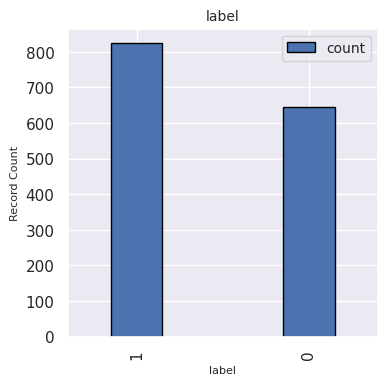

In [28]:
# Summarize the target in the dataset
chart = create_single_stacked_bar(df = data, group_by = 'label', stack_by = 'label', fig_size = (4,4), normalize = False)
table = shape_df_for_stacked_barchart(df = data, group_by = 'label', stack_by = 'label', normalize = False)
# Print a summary of the percent share of the total for each category
for i in range(len(df_cat_count)):
    # Changed 'Category' to 'Label' to access the correct column
    print('[-] the catgory of', df_cat_count['label'].iloc[i], 'makes up',
           df_cat_count['Pct of Total Text'].iloc[i], 'of the data.')

## EDA Analysis: Text Distribution

[646, 824]
['sales_core_leaf', 'service_cloud_leaf']


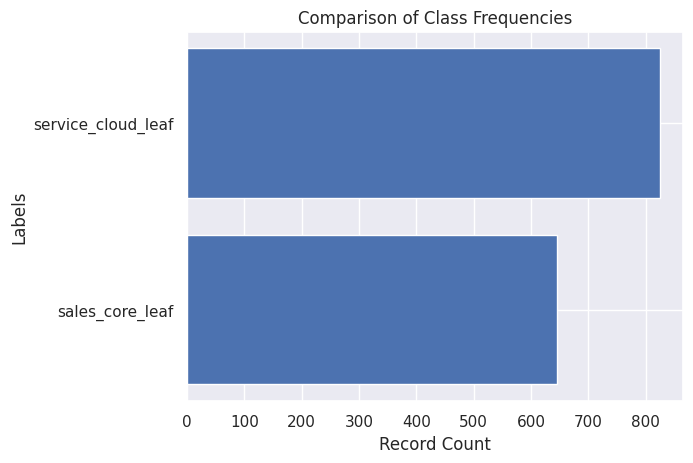

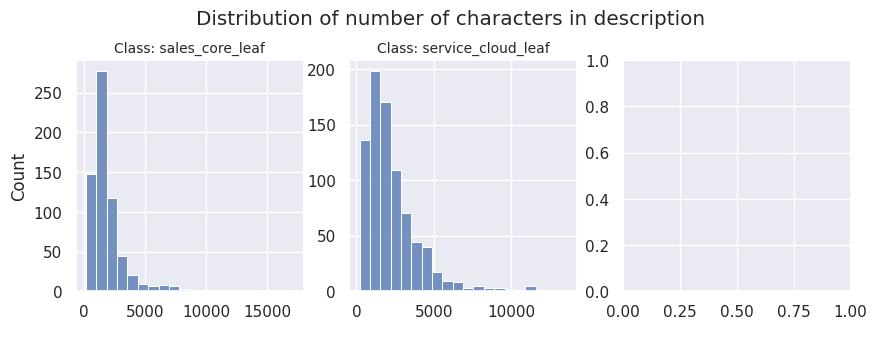

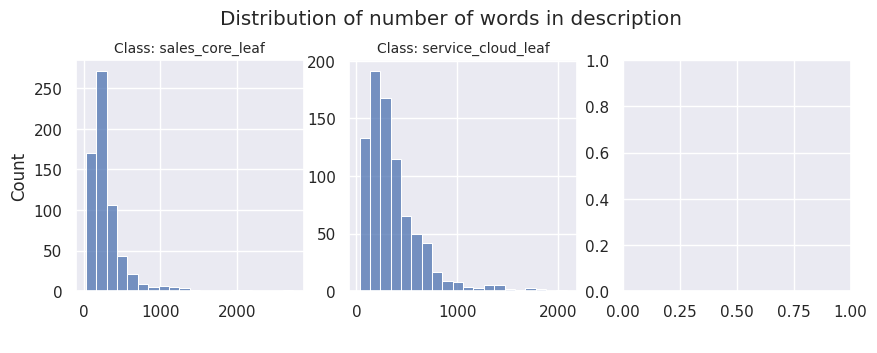

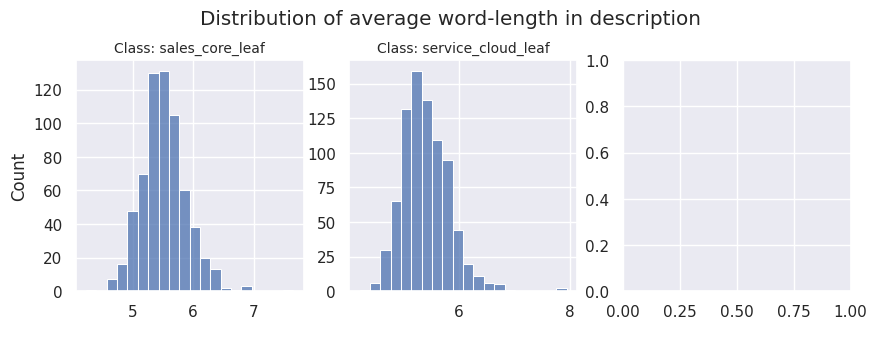

In [29]:
# Distribution of number of characters in description
viz_class_frequency(data_by_label, label_dict = inverted_label_dict)
# Distribution of number of characters in description
viz_char_frequency(data_by_label, label_dict = inverted_label_dict)
# Distribution of number of words in description
viz_word_frequency(data_by_label, label_dict = inverted_label_dict)
# Distribution of number of words in description
viz_word_length_frequency(data_by_label, label_dict = inverted_label_dict)

## EDA Results

ADD HERE

# 4.&nbsp;Train-Validation-Test Split

Split the dataset into training, validation, and test sets. Use tratified splitting to ensure that the class distribution remains consistent across these sets. The distribution of records across the labels is visualized to ensure a balanced split.

## Test Split Functions

In [30]:
# Feature-target split
def training_test_split(data, test_size = 0.2):

  # Feature-target split
  X, y = data.drop(['label'], axis = 1), data['label']

  # Train-test split (from complete data)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, stratify=y, random_state = 55)
  data_train = pd.concat([X_train, y_train], axis = 1)

  # Validation-test split (from test data)
  X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 55)
  data_val, data_test = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)

  print("Size of the training set:", len(data_train))
  print("Size of the validation set:", len(data_val))
  print("Size of the test set:", len(data_test))
  print()
  print("Labels in training set:", data_train['label'].nunique())
  print("Labels in validation set:", data_val['label'].nunique())
  print("Labels in test set:", data_test['label'].nunique())
  print()
  print("Columns in test set:", data_test.columns)
  print()


  # Create a histogram for the count of records in each label
  label_counts = data['label'].value_counts()
  plt.figure(figsize=(5, 5))
  plt.bar(label_counts.index.astype(str), label_counts.values)
  plt.xlabel('Label')
  plt.ylabel('Number of Records')
  plt.title('Distribution of Records Across Labels')
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
  plt.tight_layout()
  plt.show()

  print()

  # Comparison of sizes of training set, validation set and test set
  values = np.array([len(data_train), len(data_val), len(data_test)])
  labels = ['Training Set', 'Validation Set', 'Test Set']

  # Create the pie chart with a hole for the donut effect
  plt.figure(figsize=(5, 5))
  plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), pctdistance=0.85)

  # Add a circle at the center to create the donut hole
  centre_circle = plt.Circle((0, 0), 0.70, fc='white')
  fig = plt.gcf()
  fig.gca().add_artist(centre_circle)

  # Set the title
  plt.title("Comparison of sizes of training set, validation set and test set")

  # Ensure the circle's proportion is correct
  plt.axis('equal')

  # Display the chart
  plt.show()

  #Return Splot Data
  return data_train, data_val, data_test

## Test Split Analysis

Size of the training set: 1176
Size of the validation set: 147
Size of the test set: 147

Labels in training set: 2
Labels in validation set: 2
Labels in test set: 2

Columns in test set: Index(['id', 'text', 'title', 'url', 'label'], dtype='object')



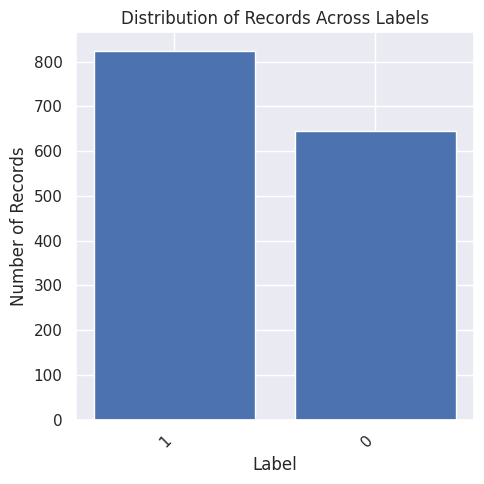

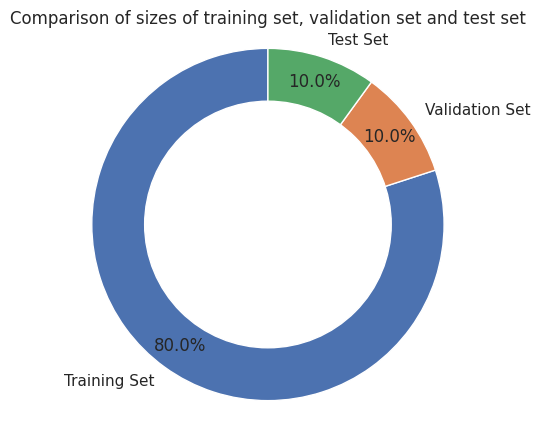

In [31]:
# Feature-target split
data_train, data_val, data_test = training_test_split(data, test_size = 0.2)

# 5.&nbsp;Data Cleansing & Text Normalization

Address missing values and duplicates, followed by a series of text preprocessing steps. Text pre-processing includes converting text to lowercase, removing punctuation, handling HTML tags, and applying stemming/lemmatization. These cleaning functions ensure the data is standardized and ready for further analysis.

## Core Normalization Functions

In [32]:
#Track a list of the descriptions and the function names
tn_funct = []; tn_desc = []

# RegexpTokenizer
regexp = RegexpTokenizer("[\w']+")

# Converting to lowercase
def convert_to_lowercase(text):
    return text.lower()

if gDEBUG:
  tn_funct.append('convert_to_lowercase(text)')
  tn_desc.append('Converting to lowercase')
  print('Testing', tn_funct[-1], "...")
  text = "This is a FUNCTION that CoNvErTs a Text to lowercase"
  print("Input: {}".format(text))
  print("Output: {}".format(convert_to_lowercase(text)))
  print()

# Removing whitespaces
def remove_whitespace(text):
    return text.strip()

if gDEBUG:
  tn_funct.append('remove_whitespace(text)')
  tn_desc.append('Removing whitespaces')
  print('Testing', tn_funct[-1], "...")
  text = " \t This is a string \t "
  print("Input: {}".format(text))
  print("Output: {}".format(remove_whitespace(text)))
  print()

# Removing punctuations
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "") # discarding apostrophe from the string to keep the contractions intact
    return text.translate(str.maketrans("", "", punct_str))

if gDEBUG:
  tn_funct.append('remove_punctuation(text)')
  tn_desc.append('Removing punctuations')
  print('Testing', tn_funct[-1], "...")
  text = "Here's [an] example? {of} &a string. with.? punctuations!!!!"
  print("Input: {}".format(text))
  print("Output: {}".format(remove_punctuation(text)))
  print()

# Removing HTML tags
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

if gDEBUG:
  tn_funct.append('remove_html(text)')
  tn_desc.append('Removing HTML tags')
  print('Testing', tn_funct[-1], "...")
  text = '<a href = "https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification"> Ecommerce Text Classification </a>'
  print("Input: {}".format(text))
  print("Output: {}".format(remove_html(text)))
  print()

# Removing emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', text)

if gDEBUG:
  tn_funct.append('remove_emoji(text)')
  tn_desc.append('Removing emojis')
  print('Testing', tn_funct[-1], "...")
  text = "This innovative hd printing technique results in durable and spectacular looking prints 😊"
  print("Input: {}".format(text))
  print("Output: {}".format(remove_emoji(text)))
  print()

# Removing other unicode characters
def remove_http(text):
    http = "https?://\S+|www\.\S+" # matching strings beginning with http (but not just "http")
    pattern = r"({})".format(http) # creating pattern
    return re.sub(pattern, "", text)

if gDEBUG:
  tn_funct.append('remove_http(text)')
  tn_desc.append('Removing other unicode characters')
  print('Testing', tn_funct[-1], "...")
  text = "It's a function that removes links starting with http: or https such as https://en.wikipedia.org/wiki/Unicode_symbols"
  print("Input: {}".format(text))
  print("Output: {}".format(remove_http(text)))
  print()

# Dictionary of acronyms
acronyms_url = 'https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/JSON/english_acronyms.json'
acronyms_dict = pd.read_json(acronyms_url, typ = 'series')

if gDEBUG:
  print("Example: Original form of the acronym 'fyi' is '{}'".format(acronyms_dict['fyi']))
  print()

# List of acronyms
acronyms_list = list(acronyms_dict.keys())

# Function to convert contractions in a text
def convert_acronyms(text):
    words = []
    for word in regexp.tokenize(text):
        if word in acronyms_list:
            words = words + acronyms_dict[word].split()
        else:
            words = words + word.split()

    text_converted = " ".join(words)
    return text_converted

if gDEBUG:
  tn_funct.append('convert_acronyms(text)')
  tn_desc.append('convert contractions in a text')
  print('Testing', tn_funct[-1], "...")
  text = "btw you've to fill in the details including dob"
  print("Input: {}".format(text))
  print("Output: {}".format(convert_acronyms(text)))
  print()

# Dictionary of contractions
contractions_url = 'https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/JSON/english_contractions.json'
contractions_dict = pd.read_json(contractions_url, typ = 'series')

if gDEBUG:
  print("Example: Original form of the contraction 'aren't' is '{}'".format(contractions_dict["aren't"]))
  print()

# List of contractions
contractions_list = list(contractions_dict.keys())

# Function to convert contractions in a text
def convert_contractions(text):
    words = []
    for word in regexp.tokenize(text):
        if word in contractions_list:
            words = words + contractions_dict[word].split()
        else:
            words = words + word.split()

    text_converted = " ".join(words)
    return text_converted

if gDEBUG:
  tn_funct.append('convert_contractions(text)')
  tn_desc.append('convert contractions in a text')
  print('Testing', tn_funct[-1], "...")
  text = "he's doin' fine"
  print("Input: {}".format(text))
  print("Output: {}".format(convert_contractions(text)))
  print()

# Stopwords
stops = stopwords.words("english") # stopwords
addstops = ["among", "onto", "shall", "thrice", "thus", "twice", "unto", "us", "would"] # additional stopwords
allstops = stops + addstops

# Function to remove stopwords from a list of texts
def remove_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in allstops])

if gDEBUG:
  tn_funct.append('remove_stopwords(text)')
  tn_desc.append('remove stopwords from a list of texts')
  print('Testing', tn_funct[-1], "...")
  text = "This is a function that removes stopwords in a given text"
  print("Input: {}".format(text))
  print("Output: {}".format(remove_stopwords(text)))
  print()

# pyspellchecker
spell = SpellChecker()

def pyspellchecker(text):
    word_list = regexp.tokenize(text)
    word_list_corrected = []
    for word in word_list:
        if word in spell.unknown(word_list):
            word_corrected = spell.correction(word)
            if word_corrected == None:
                word_list_corrected.append(word)
            else:
                word_list_corrected.append(word_corrected)
        else:
            word_list_corrected.append(word)
    text_corrected = " ".join(word_list_corrected)
    return text_corrected

if gDEBUG:
  tn_funct.append('pyspellchecker(text)')
  tn_desc.append('remove to fix spelling errors in texts')
  print('Testing', tn_funct[-1], "...")
  text = "I'm goinng therre"
  print("Input: {}".format(text))
  print("Output: {}".format(pyspellchecker(text)))
  print()

# Stemming
stemmer = PorterStemmer()
def text_stemmer(text):
    text_stem = " ".join([stemmer.stem(word) for word in regexp.tokenize(text)])
    return text_stem

if gDEBUG:
  tn_funct.append('text_stemmer(text)')
  tn_desc.append('Stemming')
  print('Testing', tn_funct[-1], "...")
  text = "Introducing lemmatization as an improvement over stemming"
  print("Input: {}".format(text))
  print("Output: {}".format(text_stemmer(text)))
  print()

# Lemmatization
spacy_lemmatizer = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])
#lemmatizer = WordNetLemmatizer()

def text_lemmatizer(text):
    text_spacy = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
    #text_wordnet = " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(text)]) # regexp.tokenize(text)
    return text_spacy
    #return text_wordnet

if gDEBUG:
  tn_funct.append('text_lemmatizer(text)')
  tn_desc.append('Lemmatization')
  print('Testing', tn_funct[-1], "...")
  text = "Introducing lemmatization as an improvement over stemming"
  print("Input: {}".format(text))
  print("Output: {}".format(text_lemmatizer(text)))
  print()

# Discardment of non-alphabetic words
def discard_non_alpha(text):
    word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
    text_non_alpha = " ".join(word_list_non_alpha)
    return text_non_alpha

if gDEBUG:
  tn_funct.append('discard_non_alpha(text)')
  tn_desc.append('Discardment of non-alphabetic words')
  print('Testing', tn_funct[-1], "...")
  text = "It is an ocean of thousands and 1000s of crowd"
  print("Input: {}".format(text))
  print("Output: {}".format(discard_non_alpha(text)))
  print()

def keep_pos(text):
    tokens = regexp.tokenize(text)
    tokens_tagged = nltk.pos_tag(tokens)
    #keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW']
    keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW', 'PRP', 'PRPS', 'RB', 'RBR', 'RBS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WPS', 'WRB']
    keep_words = [x[0] for x in tokens_tagged if x[1] in keep_tags]
    return " ".join(keep_words)

if gDEBUG:
  tn_funct.append('keep_pos(text)')
  tn_desc.append('Keep specific parts of speach')
  print('Testing', tn_funct[-1], "...")
  text = "He arrived at seven o'clock on Wednesday evening"
  print("Input: {}".format(text))
  tokens = regexp.tokenize(text)
  print("Tokens: {}".format(tokens))
  tokens_tagged = nltk.pos_tag(tokens)
  print("Tagged Tokens: {}".format(tokens_tagged))
  print("Output: {}".format(keep_pos(text)))
  print()

# Additional stopwords
alphabets = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
prepositions = ["about", "above", "across", "after", "against", "among", "around", "at", "before", "behind", "below", "beside", "between", "by", "down", "during", "for", "from", "in", "inside", "into", "near", "of", "off", "on", "out", "over", "through", "to", "toward", "under", "up", "with"]
prepositions_less_common = ["aboard", "along", "amid", "as", "beneath", "beyond", "but", "concerning", "considering", "despite", "except", "following", "like", "minus", "onto", "outside", "per", "plus", "regarding", "round", "since", "than", "till", "underneath", "unlike", "until", "upon", "versus", "via", "within", "without"]
coordinating_conjunctions = ["and", "but", "for", "nor", "or", "so", "and", "yet"]
correlative_conjunctions = ["both", "and", "either", "or", "neither", "nor", "not", "only", "but", "whether", "or"]
subordinating_conjunctions = ["after", "although", "as", "as if", "as long as", "as much as", "as soon as", "as though", "because", "before", "by the time", "even if", "even though", "if", "in order that", "in case", "in the event that", "lest", "now that", "once", "only", "only if", "provided that", "since", "so", "supposing", "that", "than", "though", "till", "unless", "until", "when", "whenever", "where", "whereas", "wherever", "whether or not", "while"]
others = ["ã", "å", "ì", "û", "ûªm", "ûó", "ûò", "ìñ", "ûªre", "ûªve", "ûª", "ûªs", "ûówe"]
additional_stops = alphabets + prepositions + prepositions_less_common + coordinating_conjunctions + correlative_conjunctions + subordinating_conjunctions + others

def remove_additional_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in additional_stops])

if gDEBUG:
  tn_funct.append('remove_additional_stopwords')
  tn_desc.append('Custom list of stop words to remove')
  print('Testing', tn_funct[-1], "...")
  print('no test defined.')

In [33]:
# Execute the set of desired text normalization functions
def text_normalizer(text):
    text = convert_to_lowercase(text)
    text = remove_whitespace(text)
    text = re.sub('\n' , '', text) # converting text to one line
    text = re.sub('\[.*?\]', '', text) # removing square brackets
    text = remove_http(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = convert_acronyms(text)
    text = convert_contractions(text)
    text = remove_stopwords(text)
    # text = pyspellchecker(text)
    text = text_lemmatizer(text)
    # text = text_stemmer(text)
    text = discard_non_alpha(text)
    text = keep_pos(text)
    text = remove_additional_stopwords(text)
    return text

text = "We'll combine all functions into 1 SINGLE FUNCTION 🙂 & apply on @product #descriptions https://en.wikipedia.org/wiki/Text_normalization"
print("Input: {}".format(text))
print("Output: {}".format(text_normalizer(text)))
print()

Input: We'll combine all functions into 1 SINGLE FUNCTION 🙂 & apply on @product #descriptions https://en.wikipedia.org/wiki/Text_normalization
Output: combine function function apply product description



In [34]:
# Apply the text normalization to the data sets and summerize the application
def apply_text_normalizer(data_train, data_val, data_test):
  # Implementing text normalization
  data_train_norm, data_val_norm, data_test_norm = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

  data_train_norm['normalized text'] = data_train['text'].apply(text_normalizer)
  data_val_norm['normalized text'] = data_val['text'].apply(text_normalizer)
  data_test_norm['normalized text'] = data_test['text'].apply(text_normalizer)

  data_train_norm['label'] = data_train['label']
  data_val_norm['label'] = data_val['label']
  data_test_norm['label'] = data_test['label']

  data_train['normalized text'] = data_train_norm['normalized text']
  data_val['normalized text'] = data_val_norm['normalized text']
  data_test['normalized text'] = data_test_norm['normalized text']

  print("Size of the training set:", len(data_train_norm))
  print("Size of the validation set:", len(data_val_norm))
  print("Size of the test set:", len(data_test_norm))
  print()
  print("Labels in training set:", data_train_norm['label'].nunique())
  print("Labels in validation set:", data_val_norm['label'].nunique())
  print("Labels in test set:", data_test_norm['label'].nunique())
  print()
  # Display normalized training data
  print("Sample of test set [normalized]:\n")
  print("Columns in test set [normalized]:", data_test_norm.columns, "\n")
  display(data_train_norm.head(3))
  print()
  # Display normalized training data
  print("Sample of test set [data]:\n")
  print("Columns in test set [data]:", data_test.columns, "\n")
  display(data_train.head(3))
  print()

  return data_train_norm, data_val_norm, data_test_norm, data_train, data_val, data_test

## Apply Text Normalization

In [35]:
%%time
# Apply text normalization
data_train_norm, data_val_norm, data_test_norm, data_train, data_val, data_test = apply_text_normalizer(data_train, data_val, data_test)

Size of the training set: 1176
Size of the validation set: 147
Size of the test set: 147

Labels in training set: 2
Labels in validation set: 2
Labels in test set: 2

Sample of test set [normalized]:

Columns in test set [normalized]: Index(['normalized text', 'label'], dtype='object') 



,normalized text,label
1414,employee service setup integrate employee serv...,1
486,turn account plan help sale team nurture grow ...,0
1005,create work plan identify incident problem cre...,1



Sample of test set [data]:

Columns in test set [data]: Index(['id', 'text', 'title', 'url', 'label', 'normalized text'], dtype='object') 



,id,text,title,url,label,normalized text
1414,es_employee_service_setup_leaf,Employee Service Setup Integrate Employee Serv...,Employee Service Setup,https://help.salesforce.com/s/articleView?id=s...,1,employee service setup integrate employee serv...
486,account_plans_setup_leaf,Turn on Account Plans To help your sales team ...,Turn on Account Plans,https://help.salesforce.com/s/articleView?id=s...,0,turn account plan help sale team nurture grow ...
1005,incident_mgmt_create_work_plan_leaf,Create a Work Plan After you identify an incid...,Create a Work Plan,https://help.salesforce.com/s/articleView?id=s...,1,create work plan identify incident problem cre...



CPU times: user 1min 1s, sys: 408 ms, total: 1min 2s
Wall time: 1min 16s


In [36]:
if gDEBUG:
  # Preview the changes for the before and after text
  print(textwrap.fill(data_train['text'][0], width=100))
  print('\n## change to ##\n')
  print(textwrap.fill(data_train['normalized text'][0], width=100))

# 6.&nbsp;Feature Engineering with TF-IDF

The TfidfVectorizer from scikit-learn is used to convert the text documents into numerical features. The vectorizer transforms the collection of documents into a matrix of token counts, which is then normalized using the Term Frequency-Inverse Document Frequency (TF-IDF) transformation. This matrix representation of the text data serves as input to the machine learning models.

## TF_IDF Functions

In [37]:
def tfid_vectorizer(data_train_norm, data_val_norm, data_test_norm):
  # Features and labels
  X_train_norm, y_train = data_train_norm['normalized text'].tolist(), data_train_norm['label'].tolist()
  X_val_norm, y_val = data_val_norm['normalized text'].tolist(), data_val_norm['label'].tolist()
  X_test_norm, y_test = data_test_norm['normalized text'].tolist(), data_test_norm['label'].tolist()

  # TF-IDF vectorization
  TfidfVec = TfidfVectorizer(ngram_range = (1, 1))
  X_train_tfidf = TfidfVec.fit_transform(X_train_norm)
  X_val_tfidf = TfidfVec.transform(X_val_norm)
  X_test_tfidf = TfidfVec.transform(X_test_norm)

  #Print The Size of the lists
  print()
  print("Shape of the training set:", X_train_tfidf.shape)
  print("Shape of the validation set:", X_val_tfidf.shape)
  print("Shape of the test set:", X_test_tfidf.shape)
  print()
  print("Size of the training labels:", len(y_train))
  print("Size of the validation labels:", len(y_val))
  print("Size of the test labels:", len(y_test))
  print()

  return X_train_tfidf, y_train, X_val_tfidf, y_val, X_test_tfidf, y_test

## Vectorization

In [38]:
# Vectorize
X_train_tfidf, y_train, X_val_tfidf, y_val, X_test_tfidf, y_test = tfid_vectorizer(data_train_norm, data_val_norm, data_test_norm)

print("Shape of the training set:", X_train_tfidf.shape)
print("Shape of the validation set:", X_val_tfidf.shape)
print("Shape of the test set:", X_test_tfidf.shape)

print("Size of the training labels:", len(y_train))
print("Size of the validation labels:", len(y_val))
print("Size of the test labels:", len(y_test))


Shape of the training set: (1176, 3807)
Shape of the validation set: (147, 3807)
Shape of the test set: (147, 3807)

Size of the training labels: 1176
Size of the validation labels: 147
Size of the test labels: 147

Shape of the training set: (1176, 3807)
Shape of the validation set: (147, 3807)
Shape of the test set: (147, 3807)
Size of the training labels: 1176
Size of the validation labels: 147
Size of the test labels: 147


# 7.&nbsp; Baseline Models: Supervised

## Model Functions

In [39]:
# Function to return summary of baseline models
def score(X_train, y_train, X_val, y_val, names, models):
    score_df, score_train, score_val = pd.DataFrame(), [], []
    x = time.time()
    for model in models:
        model.fit(X_train, y_train)
        y_train_pred, y_val_pred = model.predict(X_train), model.predict(X_val)
        score_train.append(accuracy_score(y_train, y_train_pred))
        score_val.append(accuracy_score(y_val, y_val_pred))

    score_df["Classifier"], score_df["Training accuracy"], score_df["Validation accuracy"] = names, score_train, score_val
    score_df.sort_values(by = 'Validation accuracy', ascending = False, inplace = True)
    return score_df

In [40]:
# Function to Execute a batch of baseline models
def tfid_baseline(X_train_tfidf, y_train, X_val_tfidf, y_val):

  # Classifiers
  names = [
      "Logistic Regression",
      "KNN Classifier",
      "Decision Tree",
      "Linear SVM",
      "Random Forest",
      "SGD Classifier",
      "Ridge Classifier",
      "XGBoost",
      "AdaBoost",
  ]

  models = [
      LogisticRegression(max_iter = 1000),
      KNeighborsClassifier(n_neighbors = 149, n_jobs = -1),
      DecisionTreeClassifier(),
      svm.SVC(kernel = 'linear', probability=True),
      RandomForestClassifier(n_estimators = 100),
      SGDClassifier(loss = 'hinge'),
      RidgeClassifier(),
      XGBClassifier(),
      AdaBoostClassifier()
  ]

  # Summary of baseline models
  score_results = score(X_train_tfidf, y_train, X_val_tfidf, y_val, names = names, models = models)
  display(score_results)

## Build, Train, and Evaluate the Model

In [41]:
# Baseline
tfid_baseline(X_train_tfidf, y_train, X_val_tfidf, y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



,Classifier,Training accuracy,Validation accuracy
0,Logistic Regression,0.998299,0.993197
3,Linear SVM,0.999150,0.993197
4,Random Forest,1.000000,0.993197
6,Ridge Classifier,0.999150,0.993197
5,SGD Classifier,0.999150,0.986395
7,XGBoost,1.000000,0.979592
8,AdaBoost,1.000000,0.972789
2,Decision Tree,1.000000,0.965986
1,KNN Classifier,0.955782,0.945578


# 8.&nbsp; Hyperparameter Tuning

## Tuning Functions

In [42]:
# Hyperparameter tuning for linear SVM
def tfid_svm_hyper_param_tune(X_train_tfidf, y_train, X_val_tfidf, y_val):
  svm_classifier = svm.SVC()
  params_svm = {
      'kernel': ['linear'],
      'C': [0.1, 1, 10, 100],
      'probability' : [True]
  }
  results = []  # To store results for DataFrame
  best_model_svm, best_params_svm, best_score_svm, count = svm_classifier, ParameterGrid(params_svm)[0], 0, 0
  for g in ParameterGrid(params_svm):
      time_start = time.time()
      count += 1
      print(f"Gridpoint #{count}: {g}")
      svm_classifier.set_params(**g)
      svm_classifier.fit(X_train_tfidf, y_train)
      y_train_pred, y_val_pred = svm_classifier.predict(X_train_tfidf), svm_classifier.predict(X_val_tfidf)
      score_train, score_val = accuracy_score(y_train, y_train_pred), accuracy_score(y_val, y_val_pred)
      time_stop = time.time()
      runtime = int(time_stop - time_start)  # Runtime in seconds
      m, s = int(time_stop - time_start) // 60, int(time_stop - time_start) % 60
      print(f"Training accuracy: {score_train}, Validation accuracy: {score_val}, Runtime: {m}m{s}s")
      print(" ")
      if score_val > best_score_svm:
          best_params_svm, best_score_svm = g, score_val
      # Append the results for each parameter configuration
      results.append({
          'Params': g,
          'Training Accuracy': score_train,
          'Validation Accuracy': score_val,
          'Runtime (s)': runtime
      })

  best_model_tfidf, best_params_tfidf, best_score_tfidf = svm.SVC(), best_params_svm, best_score_svm
  best_model_tfidf.set_params(**best_params_tfidf)
  print("---------------------------")
  print(f"Best model: {best_model_tfidf}")
  print(" ")
  print(f"Best parameters: {best_params_tfidf}")
  print(f"Best validation accuracy: {best_score_tfidf}")

  # Convert the results into a DataFrame
  grid_results_df = pd.DataFrame(results)

  return best_model_tfidf, best_params_tfidf, best_score_tfidf, grid_results_df

## Execute Hyperparameter Tuning

In [43]:
# Best model
best_model_tfidf, best_params_tfidf, best_score_tfidf, grid_results_df= tfid_svm_hyper_param_tune(X_train_tfidf, y_train, X_val_tfidf, y_val)
display(grid_results_df.sort_values(by = 'Validation Accuracy', ascending = False))

Gridpoint #1: {'C': 0.1, 'kernel': 'linear', 'probability': True}
Training accuracy: 0.9948979591836735, Validation accuracy: 0.9931972789115646, Runtime: 0m3s
 
Gridpoint #2: {'C': 1, 'kernel': 'linear', 'probability': True}
Training accuracy: 0.9991496598639455, Validation accuracy: 0.9931972789115646, Runtime: 0m1s
 
Gridpoint #3: {'C': 10, 'kernel': 'linear', 'probability': True}
Training accuracy: 0.9991496598639455, Validation accuracy: 0.9931972789115646, Runtime: 0m1s
 
Gridpoint #4: {'C': 100, 'kernel': 'linear', 'probability': True}
Training accuracy: 1.0, Validation accuracy: 0.9931972789115646, Runtime: 0m1s
 
---------------------------
Best model: SVC(C=0.1, kernel='linear', probability=True)
 
Best parameters: {'C': 0.1, 'kernel': 'linear', 'probability': True}
Best validation accuracy: 0.9931972789115646


,Params,Training Accuracy,Validation Accuracy,Runtime (s)
0,"{'C': 0.1, 'kernel': 'linear', 'probability': ...",0.994898,0.993197,3
1,"{'C': 1, 'kernel': 'linear', 'probability': True}",0.999150,0.993197,1
2,"{'C': 10, 'kernel': 'linear', 'probability': T...",0.999150,0.993197,1
3,"{'C': 100, 'kernel': 'linear', 'probability': ...",1.000000,0.993197,1


# 9.&nbsp;Final Prediction and Evaluation

## Evaluation Functions

In [44]:
# Generate score analysis report
def generate_score_analysis(best_model, X_test_vec, y_test, y_test_pred):
  # Print the model accuracy
  score_test = accuracy_score(y_test, y_test_pred)
  print(pd.Series({"Test accuracy": score_test}).to_string())
  print(" ")
  # Print the Test Score Summary
  print(metrics.classification_report(y_test, y_test_pred))
  print(" ")

  """
  Plots ROC curves for multiple classes in a grid layout.

  Args:
    X_test_vec: Test data vector.
    y_test: True labels for test data.
    y_test_pred_proba: Predicted probabilities for test data.
    num_classes: Number of classes.
    ncols: Number of columns in the grid.
  """

  # Get Test Probabilities
  # Assuming 'best_model' has 'predict_proba'
  y_test_pred_proba = best_model.predict_proba(X_test_vec)

   # Get the number of classes
  num_classes = y_test_pred_proba.shape[1]
  print("Number of Classes:", num_classes, "\n")

  ncols = 3
  nrows = int(np.ceil(num_classes / ncols))
  fig, axes = plt.subplots(nrows, ncols, figsize=(15, 3 * nrows))
  axes = axes.flatten()  # Flatten the axes array for easier iteration

  # Handle multiclass by iterating through classes:
  for i in range(num_classes):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba[:, i], pos_label=i)
    roc_auc = metrics.auc(fpr, tpr)

    axes[i].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    axes[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[i].set_xlim([-0.05, 1.0])
    axes[i].set_ylim([-0.05, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(f'ROC for Class {i}')
    axes[i].legend(loc="lower right")

  # Remove any unused subplots
  for i in range(num_classes, len(axes)):
    fig.delaxes(axes[i])

  plt.tight_layout()
  plt.show()
  print()

In [45]:
def conf_mat(y_test, y_test_pred, figsize=(10, 8), font_scale=1.2, annot_kws_size=16):
    """
    Generates and displays a confusion matrix.

    Args:
    y_test: The true labels.
    y_test_pred: The predicted labels.
    figsize: The size of the figure.
    font_scale: The font scale for the labels.
    annot_kws_size: The font size for the annotations.
    """
    # Get unique class names from the true labels (y_test)
    class_names = list(np.unique(np.concatenate((y_test, y_test_pred))))

    tick_marks_x = [0.5, 1.5]
    confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    confusion_matrix_df = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    plt.figure(figsize=figsize)
    sns.set(font_scale=font_scale)
    sns.heatmap(
        confusion_matrix_df,
        annot=True,
        fmt="d",
        cmap="YlGnBu",
        cbar=False,
        annot_kws={"size": annot_kws_size},
    )  # font size
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
    print()

In [46]:
# Run Best Model Predictions
def run_best_model(best_model, data_test, label_dict, X_train_vec, X_test_vec, y_train, y_test):
  print()
  print("Shape of the training set:", X_train_vec.shape)
  print("Shape of the test set:", X_test_vec.shape)
  print()
  print("Size of the training labels:", len(y_train))
  print("Size of the test labels:", len(y_test))
  print()

  print("Label Dict:", label_dict)
  print()

  # Prediction and evaluation on test set
  best_model.fit(X_train_vec, y_train)
  y_test_pred = best_model.predict(X_test_vec)

  # Get Test Probabilities
  # Assuming 'best_model' has 'predict_proba'
  y_test_pred_proba = best_model.predict_proba(X_test_vec)

  # Define a Probability Threshold
  other_threshold = 0.6

  # Apply the Custom Decision Rule
  pred_assigned = np.argmax(y_test_pred_proba, axis = 1)
  pred_assigned_proba = np.max(y_test_pred_proba, axis = 1)
  y_test_pred_custom = np.where(pred_assigned_proba < other_threshold, -1, y_test_pred)
  basic_error = np.where(y_test != y_test_pred, 1, 0)
  custom_error = np.where(np.logical_and((y_test != y_test_pred_custom), (basic_error != 1)), 1, 0)

  # Build a dataframe of predictions, probabilities, actual label
  df_pred_results = data_test
  df_pred_results['label text'] = df_pred_results['label']
  # Replace the labels with the encoded values
  df_pred_results.replace({'label text': label_dict}, inplace = True)
  # Add new columns
  df_pred_results['actual label'] = y_test
  df_pred_results['predicted label'] = y_test_pred
  df_pred_results['predicted probability'] = pred_assigned_proba
  df_pred_results['predicted probability label'] = pred_assigned
  df_pred_results['custom predicted label'] = y_test_pred_custom
  df_pred_results['basic error'] = basic_error
  df_pred_results['custom error'] = custom_error

  return y_test_pred, y_test_pred_proba, df_pred_results

## Train the Final Model

In [47]:
# Prediction and evaluation on test set
best_model, X_train_vec, X_test_vec = best_model_tfidf, X_train_tfidf, X_test_tfidf
y_test_pred, y_test_pred_proba, df_pred_results = run_best_model(best_model, data_test, inverted_label_dict, X_train_vec, X_test_vec, y_train, y_test)

#display(df_pred_results.head(3))


Shape of the training set: (1176, 3807)
Shape of the test set: (147, 3807)

Size of the training labels: 1176
Size of the test labels: 147

Label Dict: {0: 'sales_core_leaf', 1: 'service_cloud_leaf'}



## Evaluate the Model

Test accuracy    0.986395
 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        66
           1       0.98      1.00      0.99        81

    accuracy                           0.99       147
   macro avg       0.99      0.98      0.99       147
weighted avg       0.99      0.99      0.99       147

 
Number of Classes: 2 



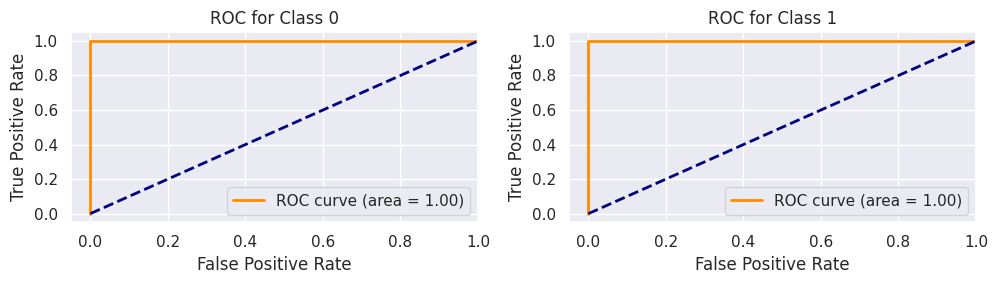

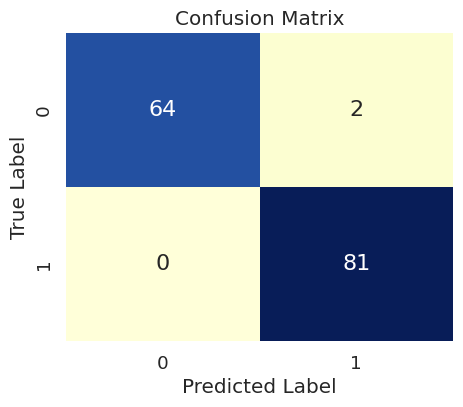

In [48]:
# Generate score analysis report
generate_score_analysis(best_model, X_test_vec, y_test, y_test_pred)

#Display Confusion Matrix
conf_mat(y_test, y_test_pred, figsize=(5, 4), font_scale=1.2, annot_kws_size=16)

## Explore Errors

In [49]:
def error_analysis(df_pred_results, display_details = False):
  #Overall Errors Detected
  basic_error_count = df_pred_results['basic error'].sum()
  custom_error_count = df_pred_results['custom error'].sum()
  total_samples = len(df_pred_results)

  basic_error_rate = (basic_error_count / total_samples) * 100
  custom_error_rate = (custom_error_count / total_samples) * 100
  total_errors_rate = (basic_error_count + custom_error_count) / total_samples * 100

  print(f"Basic Error Rate: {basic_error_rate:.2f}%")
  print(f"Custom Error Rate: {custom_error_rate:.2f}%")
  print(f"Total Error Rate: {total_errors_rate:.2f}%")

  # Display rows where basic_error or custom_error = 0
  df_pred_errors = df_pred_results[(df_pred_results['basic error'] == 1) | (df_pred_results['custom error'] == 1)]
  # Group by the actual and predicted labels to count errors
  error_summary = df_pred_errors.groupby(['label text', 'actual label', 'predicted label'])['text'].count().reset_index(name='error count')
  total_errors = len(df_pred_errors)
  error_summary['error percentage'] = (error_summary['error count'] / total_errors) * 100
  # Display the summary
  print("\nError Summary with Percentage:")
  display(error_summary)
  if display_details:
    print("\nError Details:")
    print()
    # Display the error records
    display(df_pred_errors.head(5))

error_analysis(df_pred_results, display_details = False)

Basic Error Rate: 1.36%
Custom Error Rate: 0.00%
Total Error Rate: 1.36%

Error Summary with Percentage:


,label text,actual label,predicted label,error count,error percentage
0,sales_core_leaf,0,1,2,100.0


In [50]:
if gDEBUG:
  # Example of the text from the article that failed mapping
  example_text = data_merged['text'].iloc[461]
  # Print to Screen
  print("Length of Text:", len(example_text), "\n")
  print(textwrap.fill(example_text, width=100))

In [51]:
# All records where the scrape script failed with the code "Salesforce Help Article Loading ×"
df_scrape_errors = data_merged[data_merged['text'].str.contains("Salesforce Help Article Loading ×")]
print(f"Number of scraping errors in dataset: {len(df_scrape_errors)}")
if gDEBUG:
  display(df_scrape_errors)

Number of scraping errors in dataset: 3


# 10.&nbsp;Scale the Auto-Classifier

## Auto-Classifier Functions

In [52]:
def print_header_break(header_text= ''):
  f_text = ' --  ' + header_text.upper() + '  --'
  f_len = len(f_text)
  print('\n', '-' * f_len)
  print(f_text)
  print('', '-' * f_len, '\n')

if gDEBUG:
  print_header_break('Rerun Process L2')

In [53]:
def run_full_proj(data, scope = 'l0_id'):
  '''
  Variable List
  -- data, label_dict, inverted_label_dict
  -- data_by_label
  -- summary_table
  -- data_train, data_val, data_test
  -- data_train_norm, data_val_norm, data_test_norm
  -- X_train_tfidf, y_train, X_val_tfidf, y_val, X_test_tfidf, y_test
  -- best_model_tfidf, best_params_tfidf, best_score_tfidf
  -- best_model, X_train_vec, X_test_vec
  -- y_test_pred
  '''

  print_header_break('Scope Data')
  # Select the scope of data and label to target
  data, label_dict, inverted_label_dict = scope_data(data_merged, label_col = scope)
  print("label_dictionary:", label_dict, "\n")
  # Create the data by label structure
  data_by_label = create_data_by_label(data, 'label')
  # Display the scoped dataframe
  print("\nSample of source data:\n")
  display(data.head(5))
  # Group by l0_id and l1_id and count the number of records in each group
  summary_table = data.groupby(['label']).size().reset_index(name='record_count')
  # Display the Summary Table
  print("\nSummary of data by labels:\n")
  display(summary_table)

  # Exploritory Data Analysis
  #print_header_break('Exploritory Data Analysis')
  # Distribution of number of characters in description
  #viz_class_frequency(data_by_label, label_dict = inverted_label_dict)
  # Distribution of number of characters in description
  #viz_char_frequency(data_by_label, label_dict = inverted_label_dict)
  # Distribution of number of words in description
  #viz_word_frequency(data_by_label, label_dict = inverted_label_dict)
  # Distribution of number of words in description
  #viz_word_length_frequency(data_by_label, label_dict = inverted_label_dict)

  # Feature-target split
  print_header_break('Training-Validation-Test-Split')
  data_train, data_val, data_test = training_test_split(data, test_size = 0.2)

  # Apply text normalization
  print_header_break('Text Normalization')
  data_train_norm, data_val_norm, data_test_norm, data_train, data_val, data_test = apply_text_normalizer(data_train, data_val, data_test)
  # Display normalized training data
  print("\nSample of normalized training data:\n")
  display(data_train_norm.head(5))

  # Vectorize
  print_header_break('TF-IDF Baseline')
  X_train_tfidf, y_train, X_val_tfidf, y_val, X_test_tfidf, y_test = tfid_vectorizer(data_train_norm, data_val_norm, data_test_norm)

  # Baseline
  tfid_baseline(X_train_tfidf, y_train, X_val_tfidf, y_val)

  # Hyperparameter tuning for linear SVM
  print_header_break('TF-IDF Hyperparameter Tuning')
  best_model_tfidf, best_params_tfidf, best_score_tfidf, grid_results_df= tfid_svm_hyper_param_tune(X_train_tfidf, y_train, X_val_tfidf, y_val)
  display(grid_results_df.sort_values(by = 'Validation Accuracy', ascending = False))

  # Prediction and evaluation on test set
  print_header_break('Final Prediction and Evaluation')
  best_model, X_train_vec, X_test_vec = best_model_tfidf, X_train_tfidf, X_test_tfidf
  y_test_pred, y_test_pred_proba, df_pred_results = run_best_model(best_model, data_test, inverted_label_dict, X_train_vec, X_test_vec, y_train, y_test)
  display(df_pred_results.head(3))
  #Generate score analysis report
  generate_score_analysis(best_model, X_test_vec, y_test, y_test_pred)
  #Display Confusion Matrix
  conf_mat(y_test, y_test_pred, figsize=(10, 8), font_scale=1.2, annot_kws_size=16)
  # Summerize Errors
  error_analysis(df_pred_results)

## Rerun Process for L1


 -------------------
 --  SCOPE DATA  --
 ------------------- 

Dropping records belonging to labels with 4 or fewer records: ['sales_core_salesforce_maps_lite_leaf']
Memory usage       0.07 MB
Dataset shape    (1467, 5)
Columns in table: ['id', 'label', 'text', 'title', 'url']
label_dictionary: {'sales_core_bring_in_leads_leaf': 0, 'sales_core_turn_opptys_into_deals_leaf': 1, 'sales_core_manage_accounts_contacts_leaf': 2, 'sales_core_manage_sales_team_leaf': 3, 'sales_core_artificial_intelligence_parent_leaf': 4, 'sales_core_legacy_features_leaf': 5, 'support_admins_intro_leaf': 6, 'support_productivity_leaf': 7, 'support_deflection_leaf': 8, 'support_routing_automation_leaf': 9, 'support_metrics_leaf': 10} 

Size of the data by label dictionary: 11 


Sample of source data:



<ipython-input-15-51df0b9f07dc>:33: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,id,label,text,title,url
0,campaigns_def_leaf,0,Get to Know Salesforce Campaigns Many cross-fu...,Get to Know Salesforce Campaigns,https://help.salesforce.com/s/articleView?id=s...
1,campaigns_tour_leaf,0,Tour the Campaigns Object To get familiar with...,Tour the Campaigns Object,https://help.salesforce.com/s/articleView?id=s...
2,campaigns_use_cases_leaf,0,How Campaigns Can Help You can use Salesforce ...,How Campaigns Can Help,https://help.salesforce.com/s/articleView?id=s...
3,campaigns_use_cases_other_clouds_leaf,0,Use Campaigns with Other Clouds For a more com...,Use Campaigns with Other Clouds,https://help.salesforce.com/s/articleView?id=s...
4,campaigns_hierarchy_leaf,0,Understand Campaign Hierarchy To organize and ...,Understand Campaign Hierarchy,https://help.salesforce.com/s/articleView?id=s...



Summary of data by labels:



,label,record_count
0,0,133
1,1,120
2,2,99
3,3,275
4,4,5
5,5,11
6,6,187
7,7,174
8,8,192
9,9,147



 ---------------------------------------
 --  TRAINING-VALIDATION-TEST-SPLIT  --
 --------------------------------------- 

Size of the training set: 1173
Size of the validation set: 147
Size of the test set: 147

Labels in training set: 11
Labels in validation set: 10
Labels in test set: 10

Columns in test set: Index(['id', 'text', 'title', 'url', 'label'], dtype='object')



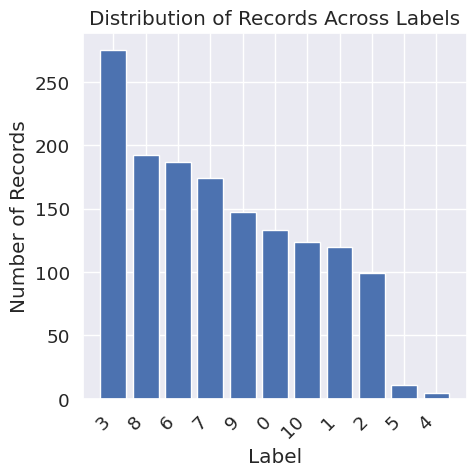

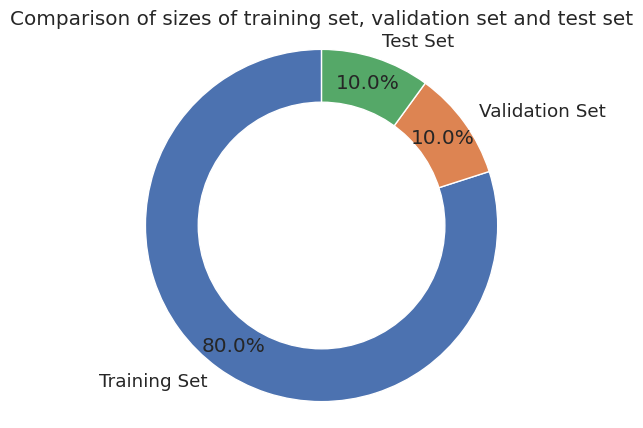


 ---------------------------
 --  TEXT NORMALIZATION  --
 --------------------------- 

Size of the training set: 1173
Size of the validation set: 147
Size of the test set: 147

Labels in training set: 11
Labels in validation set: 10
Labels in test set: 10

Sample of test set [normalized]:

Columns in test set [normalized]: Index(['normalized text', 'label'], dtype='object') 



,normalized text,label
302,consideration contact contact delete click how...,2
502,permission territory feature datum access anti...,3
263,merge duplicate account lightning experience m...,2



Sample of test set [data]:

Columns in test set [data]: Index(['id', 'text', 'title', 'url', 'label', 'normalized text'], dtype='object') 



,id,text,title,url,label,normalized text
302,contacts_del_leaf,Considerations for Deleting Contacts Most cont...,Considerations for Deleting Contacts,https://help.salesforce.com/s/articleView?id=s...,2,consideration contact contact delete click how...
502,tm2_how_access_permissions_work_leaf,How Do Permissions for Territories Affect Feat...,How Do Permissions for Territories Affect Feat...,https://help.salesforce.com/s/articleView?id=s...,3,permission territory feature datum access anti...
263,account_merge_lex_leaf,Merge Duplicate Accounts in Lightning Experien...,Merge Duplicate Accounts in Lightning Experience,https://help.salesforce.com/s/articleView?id=s...,2,merge duplicate account lightning experience m...




Sample of normalized training data:



,normalized text,label
302,consideration contact contact delete click how...,2
502,permission territory feature datum access anti...,3
263,merge duplicate account lightning experience m...,2
852,create macro lightning experience create macro...,7
483,increase pipeline forecast visibility datum cl...,3



 ------------------------
 --  TF-IDF BASELINE  --
 ------------------------ 


Shape of the training set: (1173, 3829)
Shape of the validation set: (147, 3829)
Shape of the test set: (147, 3829)

Size of the training labels: 1173
Size of the validation labels: 147
Size of the test labels: 147



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



,Classifier,Training accuracy,Validation accuracy
5,SGD Classifier,0.998295,0.986395
3,Linear SVM,0.984655,0.979592
6,Ridge Classifier,0.986360,0.972789
0,Logistic Regression,0.968457,0.965986
7,XGBoost,1.000000,0.945578
4,Random Forest,1.000000,0.931973
1,KNN Classifier,0.772379,0.823129
2,Decision Tree,1.000000,0.816327
8,AdaBoost,0.286445,0.265306



 -------------------------------------
 --  TF-IDF HYPERPARAMETER TUNING  --
 ------------------------------------- 

Gridpoint #1: {'C': 0.1, 'kernel': 'linear', 'probability': True}
Training accuracy: 0.8994032395566922, Validation accuracy: 0.9251700680272109, Runtime: 0m7s
 
Gridpoint #2: {'C': 1, 'kernel': 'linear', 'probability': True}
Training accuracy: 0.9846547314578005, Validation accuracy: 0.9795918367346939, Runtime: 0m3s
 
Gridpoint #3: {'C': 10, 'kernel': 'linear', 'probability': True}
Training accuracy: 0.9982949701619779, Validation accuracy: 0.9863945578231292, Runtime: 0m3s
 
Gridpoint #4: {'C': 100, 'kernel': 'linear', 'probability': True}
Training accuracy: 0.9991474850809889, Validation accuracy: 0.9863945578231292, Runtime: 0m4s
 
---------------------------
Best model: SVC(C=10, kernel='linear', probability=True)
 
Best parameters: {'C': 10, 'kernel': 'linear', 'probability': True}
Best validation accuracy: 0.9863945578231292


,Params,Training Accuracy,Validation Accuracy,Runtime (s)
2,"{'C': 10, 'kernel': 'linear', 'probability': T...",0.998295,0.986395,3
3,"{'C': 100, 'kernel': 'linear', 'probability': ...",0.999147,0.986395,4
1,"{'C': 1, 'kernel': 'linear', 'probability': True}",0.984655,0.979592,3
0,"{'C': 0.1, 'kernel': 'linear', 'probability': ...",0.899403,0.925170,7



 ----------------------------------------
 --  FINAL PREDICTION AND EVALUATION  --
 ---------------------------------------- 


Shape of the training set: (1173, 3829)
Shape of the test set: (147, 3829)

Size of the training labels: 1173
Size of the test labels: 147

Label Dict: {0: 'sales_core_bring_in_leads_leaf', 1: 'sales_core_turn_opptys_into_deals_leaf', 2: 'sales_core_manage_accounts_contacts_leaf', 3: 'sales_core_manage_sales_team_leaf', 4: 'sales_core_artificial_intelligence_parent_leaf', 5: 'sales_core_legacy_features_leaf', 6: 'support_admins_intro_leaf', 7: 'support_productivity_leaf', 8: 'support_deflection_leaf', 9: 'support_routing_automation_leaf', 10: 'support_metrics_leaf'}



,id,text,title,url,label,normalized text,label text,actual label,predicted label,predicted probability,predicted probability label,custom predicted label,basic error,custom error
347,contacts_supplemental_leaf,Things to Know About Contacts Review additiona...,Things to Know About Contacts,https://help.salesforce.com/s/articleView?id=s...,2,thing know contact review consideration contac...,sales_core_manage_accounts_contacts_leaf,2,2,0.988601,2,2,0,0
207,quotes_templates_supplemental_leaf,Things to Know About Quote Templates Review co...,Things to Know About Quote Templates,https://help.salesforce.com/s/articleView?id=s...,1,thing know template review consideration guide...,sales_core_turn_opptys_into_deals_leaf,1,1,0.985440,1,1,0,0
876,support_individual_object_linking_intro_leaf,Identify Customers with Individual-Object Link...,Individual-Object Linking,https://help.salesforce.com/s/articleView?id=s...,7,identify customer individualobject link help a...,support_productivity_leaf,7,7,0.907570,7,7,0,0


Test accuracy    0.965986
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      0.89      0.94         9
           3       0.96      1.00      0.98        27
           5       1.00      1.00      1.00         2
           6       0.96      0.92      0.94        25
           7       1.00      0.93      0.96        14
           8       0.96      1.00      0.98        23
           9       1.00      1.00      1.00        10
          10       0.87      0.93      0.90        14

    accuracy                           0.97       147
   macro avg       0.97      0.97      0.97       147
weighted avg       0.97      0.97      0.97       147

 
Number of Classes: 11 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



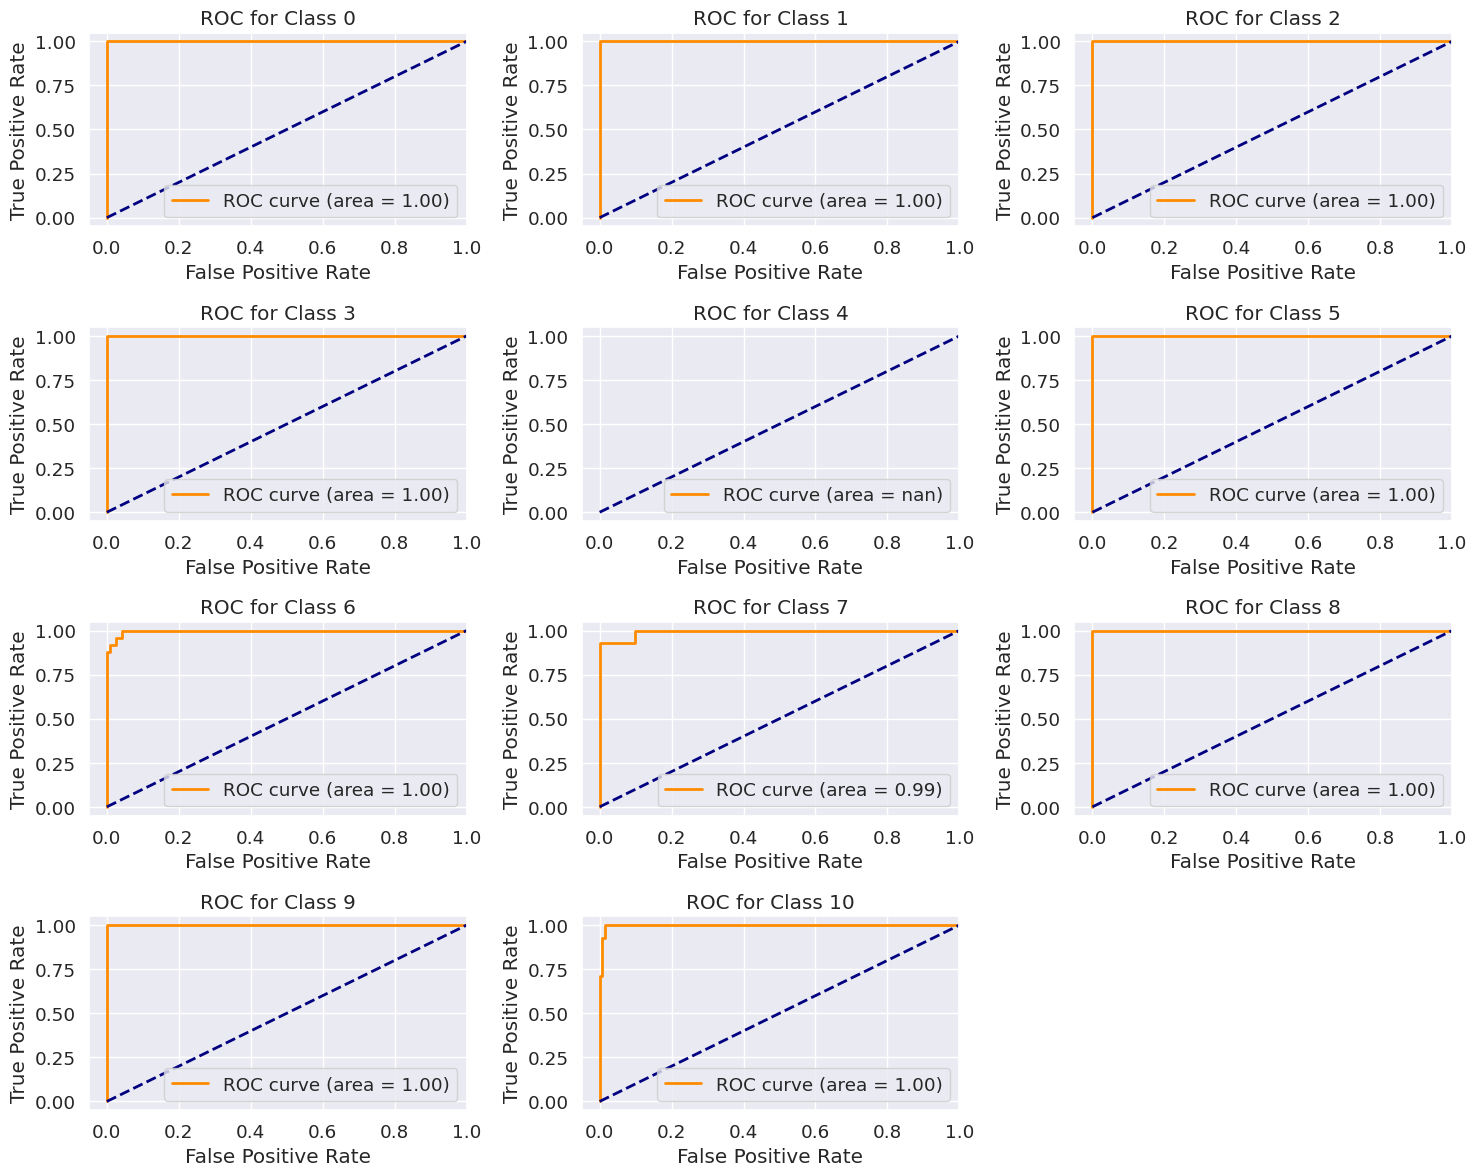

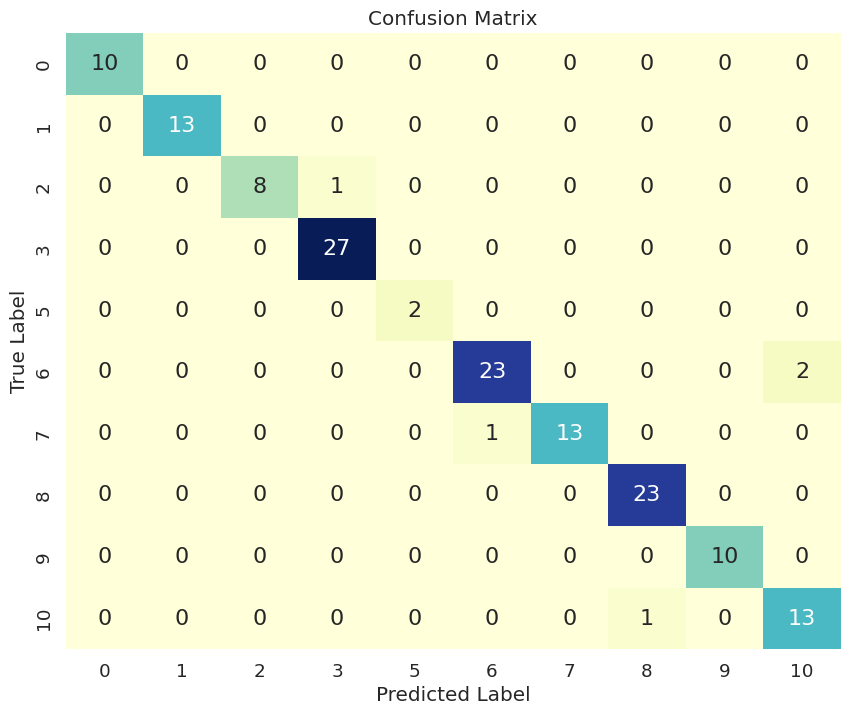


Basic Error Rate: 3.40%
Custom Error Rate: 2.72%
Total Error Rate: 6.12%

Error Summary with Percentage:


,label text,actual label,predicted label,error count,error percentage
0,sales_core_manage_accounts_contacts_leaf,2,3,1,11.111111
1,sales_core_manage_sales_team_leaf,3,3,1,11.111111
2,sales_core_turn_opptys_into_deals_leaf,1,1,1,11.111111
3,support_admins_intro_leaf,6,6,1,11.111111
4,support_admins_intro_leaf,6,10,2,22.222222
5,support_metrics_leaf,10,8,1,11.111111
6,support_metrics_leaf,10,10,1,11.111111
7,support_productivity_leaf,7,6,1,11.111111


In [54]:
run_full_proj(data, scope = 'l1_id')

## Rerun Process for L2


 -------------------
 --  SCOPE DATA  --
 ------------------- 

Dropping records belonging to labels with 4 or fewer records: ['account_plans_leaf', 'conversation_transcript_access_leaf', 'contact_request_leaf', 'msj_intro_leaf', 'console_lex_service_setup_leaf', 'support_help_center_leaf', 'sales_core_salesforce_maps_lite_considerations_leaf', 'sales_core_salesforce_maps_lite_turn_on_leaf', 'support_omni_pointer_leaf', 'sales_core_salesforce_maps_lite_latitude_longitude_leaf', 'support_data_cloud_leaf', 'omnichannel_einstein_case_routing_leaf', 'support_communities_leaf', 'support_console_leaf', 'sales_einstein_features_data_usage_leaf', 'sales_ai_for_all_setup_overview_leaf', 'sales_ai_for_all_setup_manage_users_leaf', 'ise_service_innovations_from_industries_leaf', 'einstein_copilot_for_sales_leaf', 'scm_overview_leaf', 'sales_core_artificial_intelligence_leaf']
Memory usage       0.07 MB
Dataset shape    (1438, 5)
Columns in table: ['id', 'label', 'text', 'title', 'url']
label_dic

<ipython-input-15-51df0b9f07dc>:33: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,id,label,text,title,url
0,campaigns_def_leaf,0,Get to Know Salesforce Campaigns Many cross-fu...,Get to Know Salesforce Campaigns,https://help.salesforce.com/s/articleView?id=s...
1,campaigns_tour_leaf,0,Tour the Campaigns Object To get familiar with...,Tour the Campaigns Object,https://help.salesforce.com/s/articleView?id=s...
2,campaigns_use_cases_leaf,0,How Campaigns Can Help You can use Salesforce ...,How Campaigns Can Help,https://help.salesforce.com/s/articleView?id=s...
3,campaigns_use_cases_other_clouds_leaf,0,Use Campaigns with Other Clouds For a more com...,Use Campaigns with Other Clouds,https://help.salesforce.com/s/articleView?id=s...
4,campaigns_hierarchy_leaf,0,Understand Campaign Hierarchy To organize and ...,Understand Campaign Hierarchy,https://help.salesforce.com/s/articleView?id=s...



Summary of data by labels:



,label,record_count
0,0,16
1,1,6
2,2,8
3,3,28
4,4,14
5,5,12
6,6,49
7,7,26
8,8,30
9,9,31



 ---------------------------------------
 --  TRAINING-VALIDATION-TEST-SPLIT  --
 --------------------------------------- 

Size of the training set: 1150
Size of the validation set: 144
Size of the test set: 144

Labels in training set: 41
Labels in validation set: 39
Labels in test set: 36

Columns in test set: Index(['id', 'text', 'title', 'url', 'label'], dtype='object')



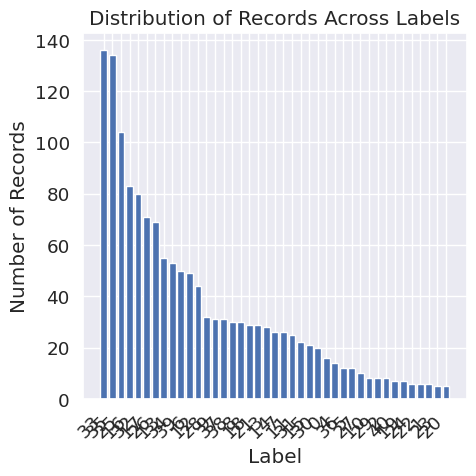

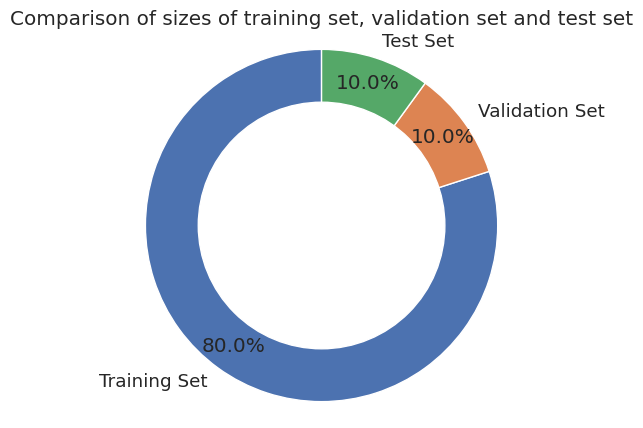


 ---------------------------
 --  TEXT NORMALIZATION  --
 --------------------------- 

Size of the training set: 1150
Size of the validation set: 144
Size of the test set: 144

Labels in training set: 41
Labels in validation set: 39
Labels in test set: 36

Sample of test set [normalized]:

Columns in test set [normalized]: Index(['normalized text', 'label'], dtype='object') 



,normalized text,label
90,lead buyer buyer assistant bot include automat...,6
1132,add network datum category page beta quickly a...,33
772,automatically add case email experience entitl...,26



Sample of test set [data]:

Columns in test set [data]: Index(['id', 'text', 'title', 'url', 'label', 'normalized text'], dtype='object') 



,id,text,title,url,label,normalized text
90,leads_sales_bots_lead_gen_leaf,Generate Leads with Buyer Assistant Buyer Assi...,Generate Leads with Buyer Assistant,https://help.salesforce.com/s/articleView?id=s...,6,lead buyer buyer assistant bot include automat...
1132,categories_add_network_data_category_object_pa...,Add the Network Data Category Object Page (Bet...,Add the Network Data Category Object Page (Beta),https://help.salesforce.com/s/articleView?id=s...,33,add network datum category page beta quickly a...
772,entitlements_auto_add_leaf,Automatically Add Entitlements to Cases from W...,Auto-Add Entitlements to Cases,https://help.salesforce.com/s/articleView?id=s...,26,automatically add case email experience entitl...




Sample of normalized training data:



,normalized text,label
90,lead buyer buyer assistant bot include automat...,6
1132,add network datum category page beta quickly a...,33
772,automatically add case email experience entitl...,26
1460,manage case service view manage employee case ...,39
733,send reply salesforce case feed use feature ca...,25



 ------------------------
 --  TF-IDF BASELINE  --
 ------------------------ 


Shape of the training set: (1150, 3701)
Shape of the validation set: (144, 3701)
Shape of the test set: (144, 3701)

Size of the training labels: 1150
Size of the validation labels: 144
Size of the test labels: 144



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



,Classifier,Training accuracy,Validation accuracy
3,Linear SVM,0.975652,0.986111
5,SGD Classifier,0.995652,0.979167
6,Ridge Classifier,0.980000,0.979167
0,Logistic Regression,0.941739,0.951389
4,Random Forest,1.000000,0.937500
7,XGBoost,1.000000,0.930556
2,Decision Tree,1.000000,0.854167
1,KNN Classifier,0.625217,0.666667
8,AdaBoost,0.237391,0.229167



 -------------------------------------
 --  TF-IDF HYPERPARAMETER TUNING  --
 ------------------------------------- 

Gridpoint #1: {'C': 0.1, 'kernel': 'linear', 'probability': True}
Training accuracy: 0.7721739130434783, Validation accuracy: 0.7847222222222222, Runtime: 0m9s
 
Gridpoint #2: {'C': 1, 'kernel': 'linear', 'probability': True}
Training accuracy: 0.9756521739130435, Validation accuracy: 0.9861111111111112, Runtime: 0m5s
 
Gridpoint #3: {'C': 10, 'kernel': 'linear', 'probability': True}
Training accuracy: 0.9982608695652174, Validation accuracy: 0.9861111111111112, Runtime: 0m6s
 
Gridpoint #4: {'C': 100, 'kernel': 'linear', 'probability': True}
Training accuracy: 0.9991304347826087, Validation accuracy: 0.9861111111111112, Runtime: 0m5s
 
---------------------------
Best model: SVC(C=1, kernel='linear', probability=True)
 
Best parameters: {'C': 1, 'kernel': 'linear', 'probability': True}
Best validation accuracy: 0.9861111111111112


,Params,Training Accuracy,Validation Accuracy,Runtime (s)
1,"{'C': 1, 'kernel': 'linear', 'probability': True}",0.975652,0.986111,5
2,"{'C': 10, 'kernel': 'linear', 'probability': T...",0.998261,0.986111,6
3,"{'C': 100, 'kernel': 'linear', 'probability': ...",0.999130,0.986111,5
0,"{'C': 0.1, 'kernel': 'linear', 'probability': ...",0.772174,0.784722,9



 ----------------------------------------
 --  FINAL PREDICTION AND EVALUATION  --
 ---------------------------------------- 


Shape of the training set: (1150, 3701)
Shape of the test set: (144, 3701)

Size of the training labels: 1150
Size of the test labels: 144

Label Dict: {0: 'campaigns_def_leaf', 1: 'campaigns_setup_parent_leaf', 2: 'campaigns_landing_page_leaf', 3: 'campaigns_members_landing_page_leaf', 4: 'campaign_influence_parent_leaf', 5: 'campaigns_pardot_alignment_parent_leaf', 6: 'leads_def_leaf', 7: 'products_pricebooks_leaf', 8: 'opportunities_leaf', 9: 'quotes_overview_leaf', 10: 'contract_def_leaf', 11: 'order_overview_leaf', 12: 'accounts_leaf', 13: 'contacts_overview_leaf', 14: 'revenue_intelligence_leaf', 15: 'pipeline_inspection_leaf', 16: 'forecasts3_intro_leaf', 17: 'tm2_intro_leaf', 18: 'teamselling_leaf', 19: 'admin_currency_leaf', 20: 'path_overview_leaf', 21: 'workcom_overview_leaf', 22: 'partners_leaf', 23: 'sc_linkedin_sales_navigator_leaf', 24: 'admin_

,id,text,title,url,label,normalized text,label text,actual label,predicted label,predicted probability,predicted probability label,custom predicted label,basic error,custom error
791,entitlements_milestone_sequential_recurrence_leaf,Milestone Recurrence Types When you create a m...,Recurrence Types,https://help.salesforce.com/s/articleView?id=s...,26,milestone recurrence type create milestone cho...,support_service_level_agreements_leaf,26,26,0.491219,26,-1,0,1
388,pipeline_inspection_setup_rollups_leaf,Select a Forecast Rollups Method in Pipeline I...,Select a Forecast Rollups Method in Pipeline I...,https://help.salesforce.com/s/articleView?id=s...,15,forecast rollup pipeline inspection choose met...,pipeline_inspection_leaf,15,15,0.369026,16,-1,0,1
505,tm2_enable_tm2_leaf,Enable Sales Territories Start the process for...,Enable Sales Territories,https://help.salesforce.com/s/articleView?id=s...,17,sale start process manage territory distribute...,tm2_intro_leaf,17,17,0.841438,17,17,0,0


Test accuracy    0.951389
 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      0.50      0.67         4
          15       0.67      1.00      0.80         2
          16       0.92      0.92      0.92        12
          17       1.00      1.00      1.00        10

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning:

No positive sa

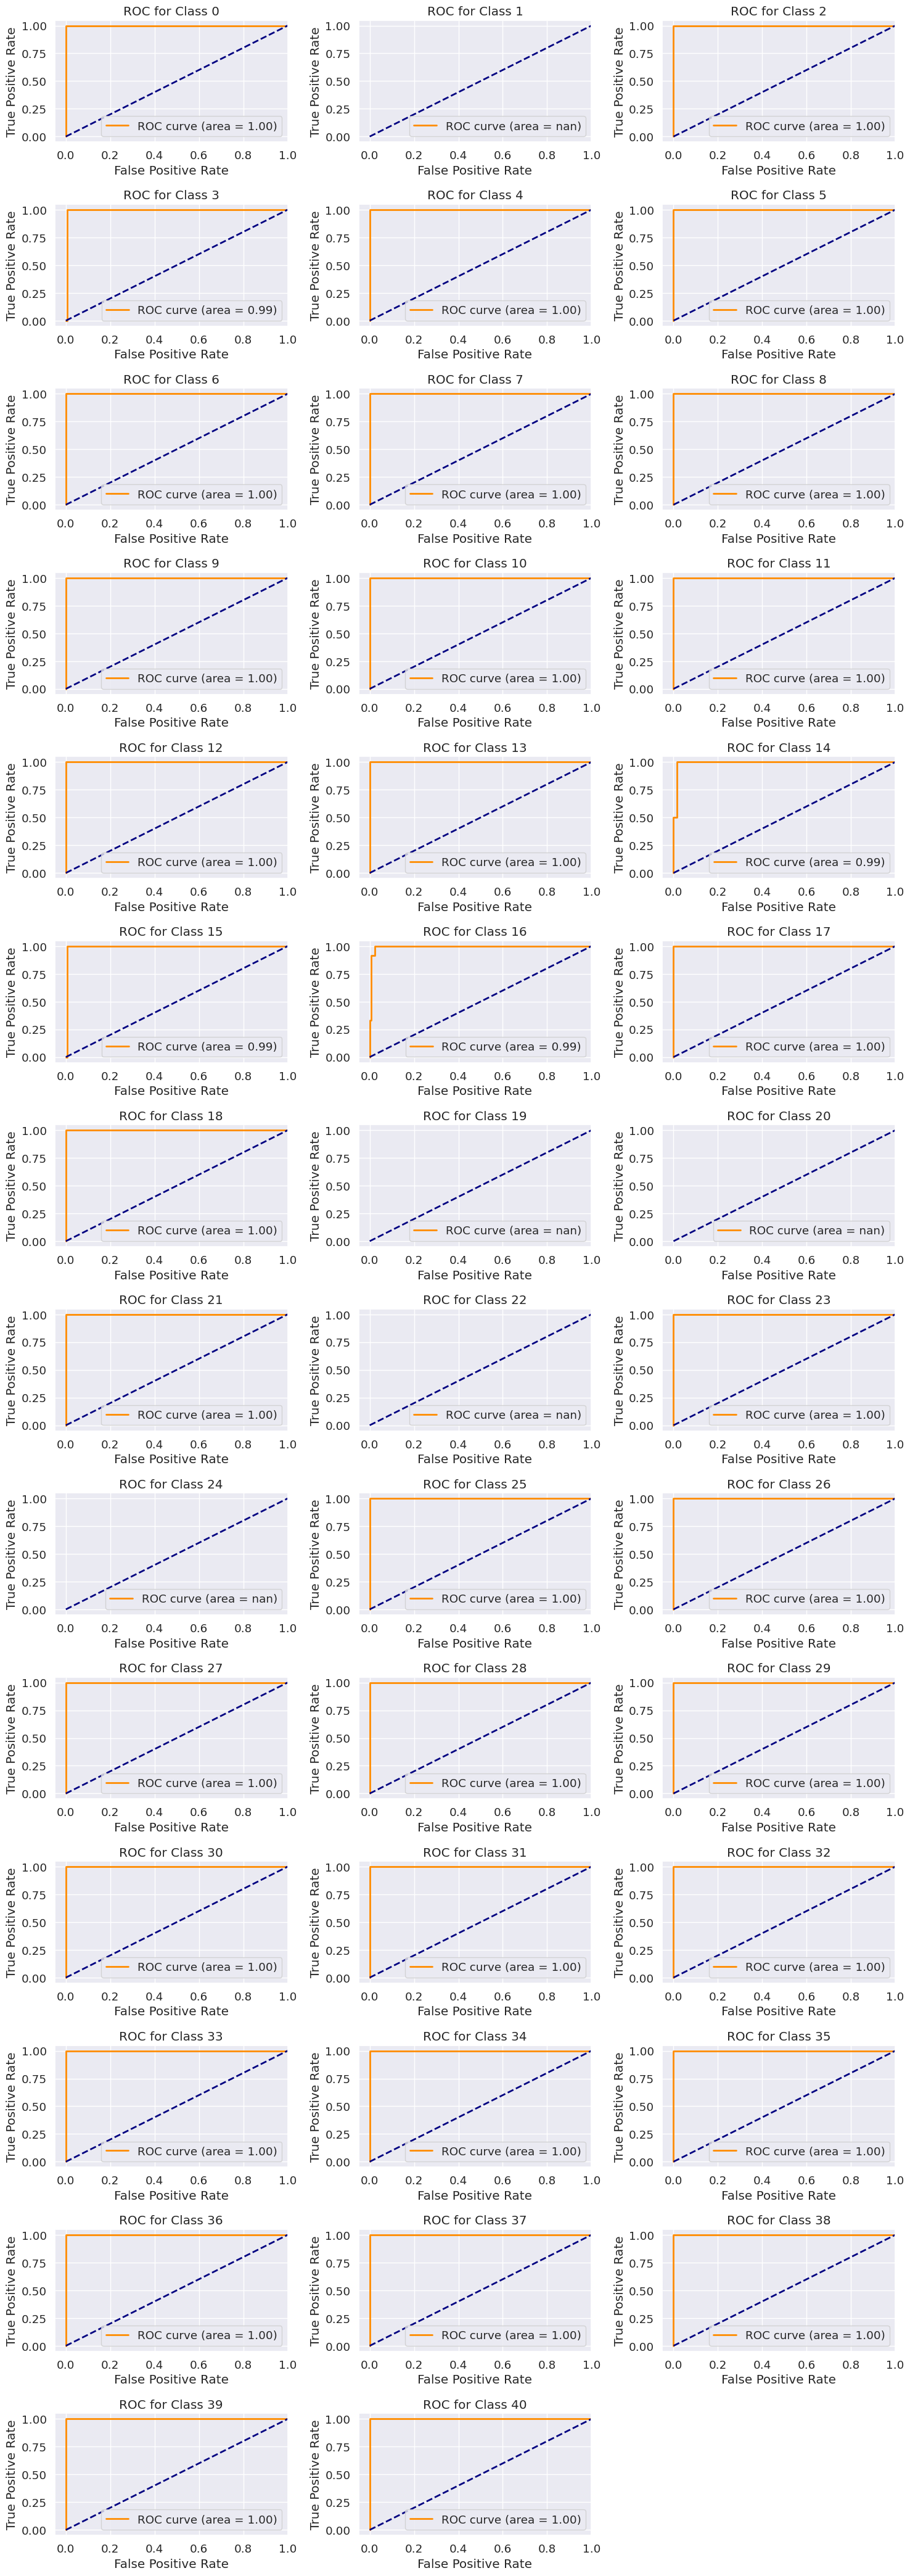

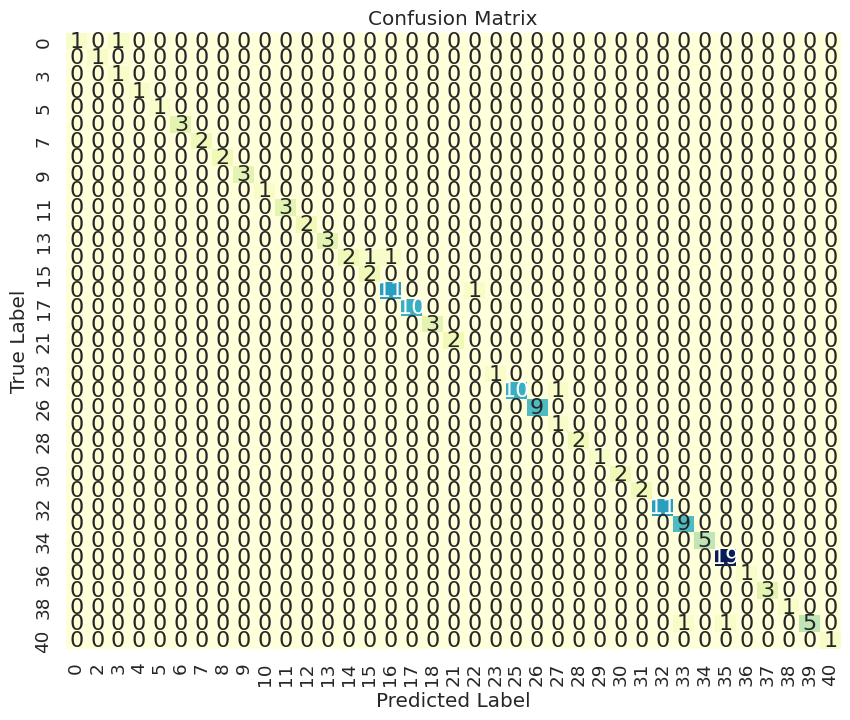


Basic Error Rate: 4.86%
Custom Error Rate: 34.03%
Total Error Rate: 38.89%

Error Summary with Percentage:


,label text,actual label,predicted label,error count,error percentage
0,automation_rules_queues_parent_leaf,36,36,1,1.785714
1,campaign_influence_parent_leaf,4,4,1,1.785714
2,campaigns_def_leaf,0,0,1,1.785714
3,campaigns_def_leaf,0,3,1,1.785714
4,campaigns_landing_page_leaf,2,2,1,1.785714
5,campaigns_members_landing_page_leaf,3,3,1,1.785714
6,campaigns_pardot_alignment_parent_leaf,5,5,1,1.785714
7,cases_intro_leaf,25,25,1,1.785714
8,cases_intro_leaf,25,27,1,1.785714
9,contacts_overview_leaf,13,13,1,1.785714


In [55]:
run_full_proj(data, scope = 'l2_id')

# 11.&nbsp; Conclusions

Across L0, L1, and L2, **Linear SVM** consistently proved to be the most effective model, maintaining high accuracy, precision, and recall. Other linear models like **SGD** and **Ridge Classifier** performed similarly well, while non-linear models, especially **AdaBoost**, showed weaker performance. Hyperparameter tuning further optimized model accuracy, demonstrating that linear models are particularly well-suited for classifying Salesforce documentation at different levels of granularity.

## Results Summary

### L0 Result Summary

For the L0 Tags, we are looking to identify Salesforce help documentation's related Cloud, either Sales or Service. The labels align to the following tags:

| Label | Description         |
|-------|---------------------|
| 0     | sales_core_leaf      |
| 1     | service_cloud_leaf   |



**Baseline Results**

| Classifier            | Training accuracy | Validation accuracy |
|-----------------------|-------------------|---------------------|
| Logistic Regression    | 0.998299          | 0.993197            |
| Linear SVM             | 0.999150          | 0.993197            |
| Random Forest          | 1.000000          | 0.993197            |
| SGD Classifier         | 0.999150          | 0.993197            |
| Ridge Classifier       | 0.999150          | 0.993197            |
| XGBoost                | 1.000000          | 0.979592            |
| AdaBoost               | 1.000000          | 0.972789            |
| Decision Tree          | 1.000000          | 0.959184            |
| KNN Classifier         | 0.955782          | 0.945578            |

**Hyperparameter Tuning Results**

| Params                                               | Training Accuracy | Validation Accuracy | Runtime (s) |
|------------------------------------------------------|-------------------|---------------------|-------------|
| {'C': 0.1, 'kernel': 'linear', 'probability': ...    | 0.994898          | 0.993197            | 3           |
| {'C': 1, 'kernel': 'linear', 'probability': True}    | 0.999150          | 0.993197            | 1           |
| {'C': 10, 'kernel': 'linear', 'probability': True}   | 0.999150          | 0.993197            | 1           |
| {'C': 100, 'kernel': 'linear', 'probability': ...    | 1.000000          | 0.993197            | 1           |

**Best Model Results**

- **Best Model**: SVC(C=0.1, kernel='linear', probability=True)
- **Number of Classes**: 2
- **Best Validation Accuracy**: 0.993197
- **Test Accuracy**: 0.986395

**Best Model Performance**

|               | Precision | Recall | F1-Score | Support |
|---------------|-----------|--------|----------|---------|
| **0**         | 1.00      | 0.97   | 0.98     | 66      |
| **1**         | 0.98      | 1.00   | 0.99     | 81      |
|---------------|-----------|--------|----------|---------|
| **Accuracy**  |           |        | 0.99     | 147     |
| **Macro avg** | 0.99      | 0.98   | 0.99     | 147     |
| **Weighted avg** | 0.99   | 0.99   | 0.99     | 147     |




### L1 Result Summary

For the L1 Tags, we are looking to identify parts of Sales Cloud and Service Cloud that are related to major Jobs to Be Done (JTBD). These labels align to the following tags:

| Label | Description                                 |
|-------|---------------------------------------------|
| 0     | sales_core_bring_in_leads_leaf              |
| 1     | sales_core_turn_opptys_into_deals_leaf      |
| 2     | sales_core_manage_accounts_contacts_leaf    |
| 3     | sales_core_manage_sales_team_leaf           |
| 4     | sales_core_artificial_intelligence_parent_leaf |
| 5     | sales_core_legacy_features_leaf             |
| 6     | support_admins_intro_leaf                   |
| 7     | support_productivity_leaf                   |
| 8     | support_deflection_leaf                     |
| 9     | support_routing_automation_leaf             |
| 10    | support_metrics_leaf                        |


**Baseline Results**

| Classifier            | Training Accuracy | Validation Accuracy |
|-----------------------|-------------------|---------------------|
| SGD Classifier        | 0.998295          | 0.986395            |
| Linear SVM            | 0.984655          | 0.979592            |
| Ridge Classifier      | 0.986360          | 0.972789            |
| Logistic Regression   | 0.968457          | 0.965986            |
| XGBoost               | 1.000000          | 0.945578            |
| Random Forest         | 1.000000          | 0.931973            |
| KNN Classifier        | 0.772379          | 0.823129            |
| Decision Tree         | 1.000000          | 0.816327            |
| AdaBoost              | 0.286445          | 0.265306            |

**Hyperparameter Tuning Results**

| Params                                               | Training Accuracy | Validation Accuracy | Runtime (s) |
|------------------------------------------------------|-------------------|---------------------|-------------|
| {'C': 10, 'kernel': 'linear', 'probability': ...     | 0.998295          | 0.986395            | 3           |
| {'C': 100, 'kernel': 'linear', 'probability': ...    | 0.999147          | 0.986395            | 4           |
| {'C': 1, 'kernel': 'linear', 'probability': True}    | 0.984655          | 0.979592            | 3           |
| {'C': 0.1, 'kernel': 'linear', 'probability': ...    | 0.899403          | 0.925170            | 7           |

**Best Model Results**

- **Best Model**: SVC(C=10, kernel='linear', probability=True)
- **Number of Classes**: 11
- **Best Validation Accuracy**: 0.98639455
- **Test Accuracy**: 0.965986

**Best Model Performance**

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| **0** | 1.00      | 1.00   | 1.00     | 10      |
| **1** | 1.00      | 1.00   | 1.00     | 13      |
| **2** | 1.00      | 0.89   | 0.94     | 9       |
| **3** | 0.96      | 1.00   | 0.98     | 27      |
| **5** | 1.00      | 1.00   | 1.00     | 2       |
| **6** | 0.96      | 0.92   | 0.94     | 25      |
| **7** | 1.00      | 0.93   | 0.96     | 14      |
| **8** | 0.96      | 1.00   | 0.98     | 23      |
| **9** | 1.00      | 1.00   | 1.00     | 10      |
| **10** | 0.87     | 0.93   | 0.90     | 14      |
|-------|-----------|--------|----------|---------|
| **Accuracy**      |           |        | 0.97     | 147     |
| **Macro avg**     | 0.97      | 0.97   | 0.97     | 147     |
| **Weighted avg**  | 0.97      | 0.97   | 0.97     | 147     |

### L2 Result Summary

For the L2 Tags, we are looking to identify parts of Sales Cloud and Service Cloud that are related to features that support a Job to Be Done (JTBD). These are even more granular labels align to the following tags:

| Label | Description                                                   |
|-------|---------------------------------------------------------------|
| 0     | campaigns_def_leaf                                             |
| 1     | campaigns_setup_parent_leaf                                    |
| 2     | campaigns_landing_page_leaf                                    |
| 3     | campaigns_members_landing_page_leaf                            |
| 4     | campaign_influence_parent_leaf                                 |
| 5     | campaigns_pardot_alignment_parent_leaf                         |
| 6     | leads_def_leaf                                                 |
| 7     | products_pricebooks_leaf                                       |
| 8     | opportunities_leaf                                             |
| 9     | quotes_overview_leaf                                           |
| 10    | contract_def_leaf                                              |
| 11    | order_overview_leaf                                            |
| 12    | accounts_leaf                                                  |
| 13    | contacts_overview_leaf                                         |
| 14    | revenue_intelligence_leaf                                      |
| 15    | pipeline_inspection_leaf                                       |
| 16    | forecasts3_intro_leaf                                          |
| 17    | tm2_intro_leaf                                                 |
| 18    | teamselling_leaf                                               |
| 19    | admin_currency_leaf                                            |
| 20    | path_overview_leaf                                             |
| 21    | workcom_overview_leaf                                          |
| 22    | partners_leaf                                                  |
| 23    | sc_linkedin_sales_navigator_leaf                               |
| 24    | admin_supportsetup_leaf                                        |
| 25    | cases_intro_leaf                                               |
| 26    | support_service_level_agreements_leaf                          |
| 27    | quick_text_setting_up_leaf                                     |
| 28    | macros_def_leaf                                                |
| 29    | support_individual_object_linking_intro_leaf                   |
| 30    | voice_conversation_intelligence_leaf                           |
| 31    | service_swarming_intro_leaf                                    |
| 32    | incident_mgmt_leaf                                             |
| 33    | knowledge_whatis_leaf                                          |
| 34    | svc_intro_leaf                                                 |
| 35    | omnichannel_intro_leaf                                         |
| 36    | automation_rules_queues_parent_leaf                            |
| 37    | service_intelligence_intro_leaf                                |
| 38    | shift_scheduling_intro_leaf                                    |
| 39    | es_employee_service_for_enhanced_employee_support_experience_leaf |
| 40    | support_reporting_leaf                                         |

**Baseline Results**

| Classifier            | Training Accuracy | Validation Accuracy |
|-----------------------|-------------------|---------------------|
| Linear SVM            | 0.975652          | 0.986111            |
| SGD Classifier        | 0.995652          | 0.979167            |
| Ridge Classifier      | 0.980000          | 0.979167            |
| Logistic Regression   | 0.941739          | 0.951389            |
| Random Forest         | 1.000000          | 0.937500            |
| XGBoost               | 1.000000          | 0.930556            |
| Decision Tree         | 1.000000          | 0.854167            |
| KNN Classifier        | 0.625217          | 0.666667            |
| AdaBoost              | 0.237391          | 0.229167            |

**Hyperparameter Tuning Results**

| Params                                               | Training Accuracy | Validation Accuracy | Runtime (s) |
|------------------------------------------------------|-------------------|---------------------|-------------|
| {'C': 1, 'kernel': 'linear', 'probability': True}    | 0.975652          | 0.986111            | 5           |
| {'C': 10, 'kernel': 'linear', 'probability': ...     | 0.998261          | 0.986111            | 6           |
| {'C': 100, 'kernel': 'linear', 'probability': ...    | 0.999130          | 0.986111            | 5           |
| {'C': 0.1, 'kernel': 'linear', 'probability': ...    | 0.772174          | 0.784722            | 9           |

**Best Model Results**

- **Best Model**: SVC(C=1, kernel='linear', probability=True)
- **Number of Classes**: 41
- **Best Validation Accuracy**: 0.986111
- **Test Accuracy**: 0.951389

**Best Model Performance**

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| **0** | 1.00      | 0.50   | 0.67     | 2       |
| **2** | 1.00      | 1.00   | 1.00     | 1       |
| **3** | 0.50      | 1.00   | 0.67     | 1       |
| **4** | 1.00      | 1.00   | 1.00     | 1       |
| **5** | 1.00      | 1.00   | 1.00     | 1       |
| **6** | 1.00      | 1.00   | 1.00     | 3       |
| **7** | 1.00      | 1.00   | 1.00     | 2       |
| **8** | 1.00      | 1.00   | 1.00     | 2       |
| **9** | 1.00      | 1.00   | 1.00     | 3       |
| **10** | 1.00     | 1.00   | 1.00     | 1       |
| **11** | 1.00     | 1.00   | 1.00     | 3       |
| **12** | 1.00     | 1.00   | 1.00     | 2       |
| **13** | 1.00     | 1.00   | 1.00     | 3       |
| **14** | 1.00     | 0.50   | 0.67     | 4       |
| **15** | 0.67     | 1.00   | 0.80     | 2       |
| **16** | 0.92     | 0.92   | 0.92     | 12      |
| **17** | 1.00     | 1.00   | 1.00     | 10      |
| **18** | 1.00     | 1.00   | 1.00     | 3       |
| **21** | 1.00     | 1.00   | 1.00     | 2       |
| **22** | 0.00     | 0.00   | 0.00     | 0       |
| **23** | 1.00     | 1.00   | 1.00     | 1       |
| **25** | 1.00     | 0.91   | 0.95     | 11      |
| **26** | 1.00     | 1.00   | 1.00     | 9       |
| **27** | 0.50     | 1.00   | 0.67     | 1       |
| **28** | 1.00     | 1.00   | 1.00     | 2       |
| **29** | 1.00     | 1.00   | 1.00     | 1       |
| **30** | 1.00     | 1.00   | 1.00     | 2       |
| **31** | 1.00     | 1.00   | 1.00     | 2       |
| **32** | 1.00     | 1.00   | 1.00     | 11      |
| **33** | 0.90     | 1.00   | 0.95     | 9       |
| **34** | 1.00     | 1.00   | 1.00     | 5       |
| **35** | 0.95     | 1.00   | 0.97     | 19      |
| **36** | 1.00     | 1.00   | 1.00     | 1       |
| **37** | 1.00     | 1.00   | 1.00     | 3       |
| **38** | 1.00     | 1.00   | 1.00     | 1       |
| **39** | 1.00     | 0.71   | 0.83     | 7       |
| **40** | 1.00     | 1.00   | 1.00     | 1       |
|-------|-----------|--------|----------|---------|
| **Accuracy**      |           |        | 0.95     | 144     |
| **Macro avg**     | 0.93      | 0.93   | 0.92     | 144     |
| **Weighted avg**  | 0.97      | 0.95   | 0.95     | 144     |


## Model Comparison

### L0 Model Comparisons and Findings

The goal is to classify Salesforce help documentation into two categories: **Sales Cloud** or **Service Cloud**. The classification task is framed with two labels:

- **0**: Sales Cloud
- **1**: Service Cloud

#### Baseline Results
A variety of classifiers were evaluated to establish baseline performance. The top performers, such as Logistic Regression, Linear SVM, Random Forest, and Ridge Classifier, all achieved near-perfect validation accuracy of **0.9932**. However, the **XGBoost** and **AdaBoost** classifiers showed slightly lower validation accuracy at **0.979** and **0.973**, respectively, with **KNN Classifier** performing the weakest with **0.946** validation accuracy.

#### Hyperparameter Tuning
The Linear SVM was further optimized by tuning the `C` hyperparameter, yielding the following results:

- All configurations of `C` (0.1, 1, 10, 100) with a linear kernel and probability estimation performed similarly, achieving **0.993** validation accuracy.
- The best model was found with **C=0.1**, which provided a good balance of performance and training time (runtime of 3 seconds).

#### Best Model Results
The best model was an **SVC with C=0.1** and a linear kernel. This model achieved a **validation accuracy of 0.99** and **test accuracy of 0.986**.

#### Performance Breakdown (Best Model)
The classification report on test data indicates high precision, recall, and F1-scores for both labels:

- **Sales Cloud (Label 0)**: Precision = 1.00, Recall = 0.97, F1-Score = 0.98
- **Service Cloud (Label 1)**: Precision = 0.98, Recall = 1.00, F1-Score = 0.99

The overall accuracy was **0.99**, with equally strong macro and weighted averages, indicating consistent performance across both classes.

#### Conclusion
The **SVC model with C=0.1** and a linear kernel was the best performer, achieving near-perfect accuracy in classifying Salesforce documentation into Sales or Service Cloud categories.

### L1 Model Comparisons and Findings

The objective is to classify Salesforce documentation into different Jobs to Be Done (JTBD) across **Sales Cloud** and **Service Cloud**, each aligned to the following labels:

- **Sales Cloud Tags**: Bringing in leads, managing accounts, managing the sales team, AI, legacy features.
- **Service Cloud Tags**: Admin support, productivity, deflection, automation, and metrics.

#### Baseline Results
Several classifiers were evaluated for initial performance:

- **SGD Classifier** was the top-performing model, achieving **0.986** validation accuracy.
- **Linear SVM** and **Ridge Classifier** also performed well, with validation accuracies of **0.979** and **0.972**, respectively.
- Other models like **Logistic Regression** and **XGBoost** had slightly lower validation accuracy (**0.965** and **0.945**).
- Models like **KNN**, **Decision Tree**, and **AdaBoost** performed significantly worse, with validation accuracies as low as **0.265** for AdaBoost.

#### Hyperparameter Tuning Results
The best performance was achieved by fine-tuning the **Linear SVM** classifier:

- **SVC with C=10** yielded the best validation accuracy of **0.986** with a training time of **3 seconds**.
- Other parameter configurations for the linear kernel (C=1, C=100) performed similarly, all yielding high validation accuracy close to the best-performing model.

#### Best Model Results
- **Best Model**: SVC(C=10, kernel='linear', probability=True)
- **Number of Classes**: 11 (reflecting the JTBD labels across Sales and Service Cloud)
- **Best Validation Accuracy**: 0.98
- **Test Accuracy**: 0.97

#### Best Model Performance
The classification report for the test set indicates strong performance across all classes:

- **High precision, recall, and F1-scores** were achieved for most classes, especially for jobs like **bringing in leads, managing accounts, and automation**.
- Some variability in F1-scores was observed in smaller classes like **Class 2** (managing accounts) and **Class 10** (metrics), but overall the model performed very well, with an accuracy of **0.97**.

#### Conclusion
The **SVC model with C=10** and a linear kernel was the best-performing model for classifying Salesforce documentation into Jobs to Be Done. It achieved high accuracy across both Sales and Service Cloud categories, making it an effective solution for classifying tasks within these two major areas.

### L2 Model Comparisons and Findings

The task is to classify Salesforce documentation into granular features within **Sales Cloud** and **Service Cloud** that support specific Jobs to Be Done (JTBD). Each label corresponds to a detailed feature (e.g., **Campaigns**, **Opportunities**, **Cases**, etc.).

#### Baseline Results

Several classifiers were evaluated for initial performance:

- **Linear SVM** was the top-performing model, achieving **0.986** validation accuracy.
- **SGD Classifier** and **Ridge Classifier** also performed well, with validation accuracies of **0.979** each.
- Other models like **Logistic Regression** and **Random Forest** had slightly lower validation accuracy (**0.951** and **0.937**, respectively).
- Models like **KNN** and **Decision Tree** performed poorly, with **AdaBoost** showing the worst performance at **0.229** validation accuracy.

#### Hyperparameter Tuning Results
The **Linear SVM** model was further fine-tuned by adjusting the `C` parameter:

- **C=1** yielded the best performance with a validation accuracy of **0.986111** and a runtime of **5 seconds**.
- Other configurations (C=10, C=100) also performed well, but **C=0.1** had significantly lower validation accuracy (**0.784**).

#### Best Model Results
- **Best Model**: SVC(C=1, kernel='linear', probability=True)
- **Number of Classes**: 41 (reflecting the specific features within Sales Cloud and Service Cloud)
- **Best Validation Accuracy**: 0.986
- **Test Accuracy**: 0.951

#### Best Model Performance
The best model's performance on the test data shows high precision, recall, and F1-scores across most classes, although a few smaller classes (e.g., **Class 22**, **Class 27**) have variability due to lower support.

- **Precision**: High precision for most classes, reaching **1.00** for many features.
- **Recall**: Similarly, many features have a recall of **1.00**.
- **F1-Score**: The overall F1-scores indicate strong performance across most feature classifications.

The model achieved an overall accuracy of **0.95**, with strong macro and weighted averages indicating good performance across the 41 classes.

#### Conclusion
The **SVC model with C=1** and a linear kernel provided the best performance in classifying Salesforce documentation into specific features supporting Jobs to Be Done (JTBD). With an accuracy of **0.95**, it demonstrated strong generalization across the wide range of granular features in both Sales and Service Cloud.

## Concluding Observations

## Patterns and Conclusions Across the Models

Across all three levels (L0, L1, and L2), consistent patterns and similarities emerge in the model results:

1. **Consistent Top Performers**:
   - **Linear SVM** consistently emerged as a top-performing model across all levels, achieving validation accuracies around **0.986**. Whether classifying broad categories (L0), specific Jobs to Be Done (L1), or granular features (L2), Linear SVM with hyperparameter tuning performed at or near the top.
   - **SGD Classifier** and **Ridge Classifier** also performed strongly across L1 and L2, achieving similar high validation accuracies, reflecting the robustness of these linear models for different levels of classification complexity.

2. **High Accuracy Across Levels**:
   - At L0, the focus was on distinguishing between **Sales Cloud** and **Service Cloud**, and the top models achieved nearly perfect validation accuracy (**0.993**).
   - At L1 and L2, where the task is to classify more specific Jobs to Be Done and granular features, the best models maintained high accuracy, with validation accuracies remaining consistently high (around **0.986**).

3. **SVC Models and Hyperparameter Tuning**:
   - In all cases, **SVC with linear kernels** yielded excellent results, with hyperparameter tuning (adjusting the `C` parameter) further optimizing performance.
   - For L0 and L1, different values of **C** (0.1, 1, 10) performed similarly well, achieving near-identical validation accuracy.
   - At L2, **C=1** was the best performer, reflecting that this middle ground between lower (C=0.1) and higher (C=100) values yielded the best balance between regularization and performance.

4. **Robustness Across Classifications**:
   - The best-performing models demonstrated robustness across different classification granularities. At L0 (broad two-class classification), L1 (11 JTBD classes), and L2 (41 feature classes), the **Linear SVM** consistently achieved high precision, recall, and F1-scores, indicating generalization across multiple levels of complexity.

5. **Weaker Performance of Non-Linear Models**:
   - Non-linear models like **XGBoost**, **Random Forest**, and especially **KNN** and **AdaBoost** consistently underperformed compared to linear models. While **XGBoost** and **Random Forest** still provided competitive results, models like **AdaBoost** showed much lower validation accuracies, particularly at L1 and L2, where validation accuracy dropped to **0.229**.

# 12.&nbsp; References

**Scraping Script**

- [1] Thomas Bohn. 2024. sfdc_help_site_scrape.ipynb. https://github.com/TOM-BOHN/MsDS-supervised-nlp-sfdc-auto-classification/blob/main/sfdc_help_site_scrape.ipynb

**Documentation and References**

- [2] Wikipedia Contributors. 2024. Tf-idf. In Wikipedia. https://en.wikipedia.org/wiki/Tf%E2%80%93idf
- [3] Wikipedia Contributors. 2024. Word2vec. In Wikipedia. https://en.wikipedia.org/wiki/Word2vec
- [4] Wikipedia Contributors. 2024. Lemmatization. In Wikipedia. https://en.wikipedia.org/wiki/Lemmatization
- [5] Natural Language Toolkit (NLTK). 2024. https://www.nltk.org/index.html
- [6] Scikit-learn Contributors. 2024. sklearn.feature_extraction.text.TfidfVectorizer. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
- [7] Scikit-learn Contributors. 2024. sklearn.feature_extraction.text.TfidfTransformer. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
- [8] PyPI Contributors. 2024. beautifulsoup4 4.12.3. In PyPI. https://pypi.org/project/beautifulsoup4/
- [9] Selenium Contributors. 2024. Selenium Python. In Selenium-Python. https://selenium-python.readthedocs.io/installation.html#introduction
- [10] Scikit-learn Contributors. 2024. SGDClassifier. In Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier
- [11] Scikit-learn Contributors. 2024. RandomForestClassifier. In Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- [12] XGBoost Developers. 2022. XGBoost Documentation. In XGBoost Developer Guide. https://xgboost.readthedocs.io/en/stable/

**Data Source**

- [13] Salesforce. 2024. Salesforce Winter ’25 Release Notes. In Salesforce Help. https://help.salesforce.com/s/articleView?id=release-notes.salesforce_release_notes.htm&release=216&type=5
- [14] Salesforce. 2024. Sales Cloud Basics. In Salesforce Help. https://help.salesforce.com/s/articleView?id=sf.sales_core.htm&type=5
